<a href="https://colab.research.google.com/github/vivek72v/Bike_Sharing_Demand_prediction/blob/main/Final_Bike_Price_range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Pawan Kumar Singh
##### **Team Member 2 -** Vivek Kumar Singh

# **Project Summary -**

#Data Preprocessing
* The needed modules are imported and the dataset is loaded
* We take a look at the first five rows of data and then look at the number of rows and column dataset has
* We  get the information about dataset like dataset of each column and the count of non null values in them
* Dataset is checked for duplicate rows and none is found
* Dataset is checked for null and missing values and no null or missing values are found
* Some important statistics of data is obtained to get a quick overview of it
* The unique values in each column and their count is obtained

#Data Wrangling

* From the 'Date' column three columns 'day' , 'month' and 'Year' is obtained and the 'Date' column is dropped

#Data Visulaisation

* We check the distribution of the time related features through countplot
* Histogram for the weather related features 'Temperature(°C)' , 'Humidity(%)' , 'Wind speed (m/s)' and 'Dew point temperature(°C)'
* Check the distribution of  Holiday and Functioning Day columns through countplot
* Check distribution of weather related features 'Snowfall (cm)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)' , 'Seasons'
* Barplot of column 'Seasons' with "Rented Bike Count' to get relation between them
* Boxplot of 'Rented Bike Count' for each month
* Barplot of column 'Year' with "Rented Bike Count' to get relation between them
* Lineplot of column 'Hour' with "Rented Bike Count' to get relation between them
* Heatmap to show relation between month , year and the 'Rented Bike Count'
* Histogram to show average visibility with Rented Bike Count.
* Lineplot of average rainfall with Rented Bike count
* Barplot to show average snowfall with rented bike counts
* Histogram to present average wind speed with rented bike count
* Correlation Heatmap to show correlation between the varaibles
* Pairplot to visualize the relation between every pair of varaibles

#Hypothesis Testing
* Normality test using shapiro wilk test and k^2 Normality test
* Correlation test using Pearson and Spearman's Rank Correlation
* Dependency  test using chi square test

Few other statistical tests like parametric, Non-parametric, stationarity test
are performed

#Feature Engineering and Data Preprocessing
* We check and treat the outliers in the dependent variable through Z-score , IQR and percentile method and the best result to get rid of ouliers is obtained by applyingh square root to the data.
* the categorical values are encoded through One Hot Encoding technique to make data fit for our machine learning models
* The features are checked for correlation through regression plot and correlation heatmap and the column 'Temperature(°C)' is dropped beacause it is highly correlated to feature 'Dew point temperature(°C)'.
* We split the dataset into two parts 
1. Independent variables 
2. Dependent variables 
* Next we split data into train and test set
* The data is scaled through  standard scaler

#ML Model Implementaion
* Linear Regression Model is implemented and optimized through Hyperparameter Tuning using GridSearchCV
* Elastic Net Linear Regression Model is implemented and optimized through Hyperparameter Tuning using GridSearchCV
* Decision Tree model is implemented
* Random forest regressor model is implemented

From the models used we select RandomForestRegressor as it gives the best  R2 score of 90%.

Feature importance is shown  in descending order.


# **GitHub Link -**

https://github.com/vivek72v/Bike_Sharing_Demand_prediction

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessesns the waiting time.
Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prdiction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
# Load Dataset
df =pd.read_csv("/content/drive/MyDrive/Bike_Sharing_Demand_Prediction/SeoulBikeData.csv",encoding= 'unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_value = df.duplicated().sum()

In [ ]:
duplicate_value

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
is_null = df.isnull().sum().sort_values(ascending = False)

In [ ]:
is_null

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

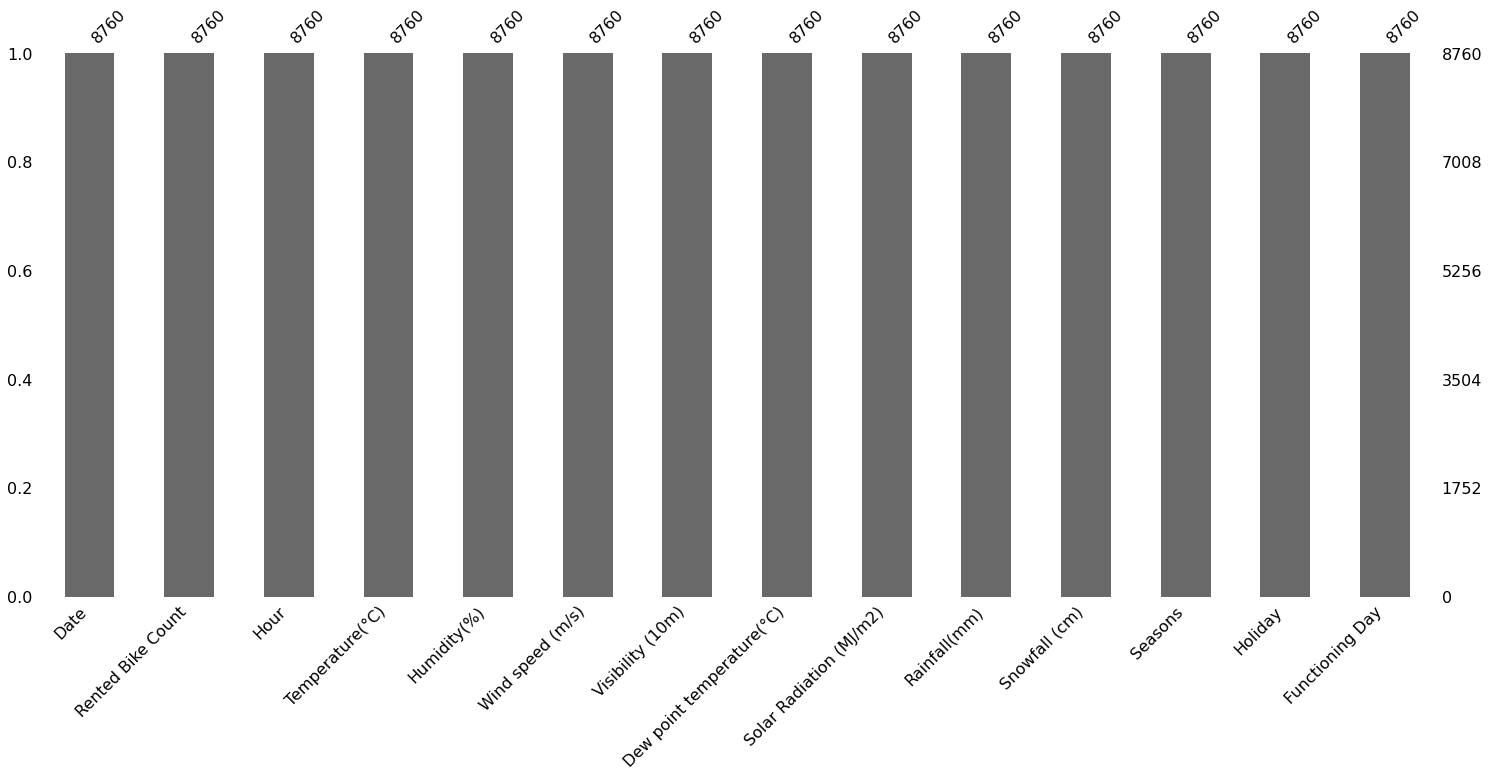

In [ ]:
# Visualizing the missing values
msno.bar(df)

No missing values present

### What did you know about your dataset?

This dataset contains a single file which help us to predict bike demand prediction in different areas.Including information such as
date,hour,temp, humidity, visibility and so on.The data set contains 8760 rows and 14 columns.In this dataset we find data types of every columns i.e(int, float, string and object).And observe that some columns data types is not accurate and remove later.In this dataset we dont have any null value as well as no dupilcate values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description 

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')



*   Date - Date

*   Hour - Hour od the day(0-23)

*   Temperature : Temperature of the day

*   Humidity : Humidity measure

*   Windspeed : Windseepd

*   visibility : visibility measure

*   Dew Point Temperature : Dew Point Temmperature measure


*   Solar Radiation : Solar Radiation Measure


*   Rainfall : Rainfall in mm


*   Snowfall : Snowfall measure


*   Seasons : 1 = spring,2=summer,3=fall,4=winter
*   Holiday : Whether a holiday or not

*   Functional Day : Whether a functional day or not
*   Rented Bike count : Count of Rented bike on date.






### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
#Getting all the unique values for each column in the dataset
print(df.apply(lambda col: col.unique()))

Date                         [01/12/2017, 02/12/2017, 03/12/2017, 04/12/201...
Rented Bike Count            [254, 204, 173, 107, 78, 100, 181, 460, 930, 4...
Hour                         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Temperature(°C)              [-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7....
Humidity(%)                  [37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2...
Wind speed (m/s)             [2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ...
Visibility (10m)             [2000, 1928, 1996, 1936, 793, 1913, 1687, 1380...
Dew point temperature(°C)    [-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19...
Solar Radiation (MJ/m2)      [0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01...
Rainfall(mm)                 [0.0, 0.5, 1.0, 2.5, 0.1, 0.2, 0.3, 0.7, 1.6, ...
Snowfall (cm)                [0.0, 0.1, 0.3, 0.4, 0.2, 1.0, 0.9, 0.8, 0.7, ...
Seasons                                       [Winter, Spring, Summer, Autumn]
Holiday                                             

## 3. ***Data Wrangling***

### Data Wrangling Code

Data Cleaning

In [ ]:
# Write your code to make your dataset analysis ready.
#Checking Null values in the dataset
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
#Checking presence of any duplicate rows in dataset
df.duplicated().sum()

0

In [ ]:
#Checking the datatype of each column
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [ ]:
#Breaking the date column into three different columns representing the days , months and years
from datetime import datetime
import datetime as dt
df['Date'] = df['Date'].apply(lambda x : dt.datetime.strptime(x,"%d/%m/%Y"))
df['day'] = df['Date'].apply(lambda r:r.day)
df['month'] = df['Date'].apply(lambda r:r.month)
df['Year'] = df['Date'].apply(lambda r:r.year)

In [ ]:
#Checking "date" column has been successfully changed to datatype datetime and the time related columns added
df.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
day                                   int64
month                                 int64
Year                                  int64
dtype: object

In [ ]:
#Dropping the date column
df.drop(['Date'], axis =1, inplace = True)

### What all manipulations have you done and insights you found?



*   As we can see in our dataframe date columns is in object formate so first we convert in into date formate.

*   After convertung it into date format,we have seen that there are few columns 
required in dataframe for analysis purpose 
which can be extracted from the given columns.


*   We created three new columns day, month and year from date columns.



*   And we are also droping the Date columns becasue of no more use of it.



*   Our dataFrame has no null value so we dont have to worry about it.
*   Our dataFrame also dont have any missing values





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Univariate Analysis

Univariate Analysis is a type of data visualization where we visualize only a single variable at a time. Univariate Analysis helps us to analyze the distribution of the variable present in the data so that we can perform further analysis.

#### Chart - 1

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day', 'month', 'Year'],
      dtype='object')

In [ ]:
# Chart - 1 visualization code
#Getting unique values of 'Hour' column
df['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
#Getting the value count of each value in 'Hour' column
df['Hour'].value_counts().sort_index(ascending = True)

0     365
1     365
2     365
3     365
4     365
5     365
6     365
7     365
8     365
9     365
10    365
11    365
12    365
13    365
14    365
15    365
16    365
17    365
18    365
19    365
20    365
21    365
22    365
23    365
Name: Hour, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

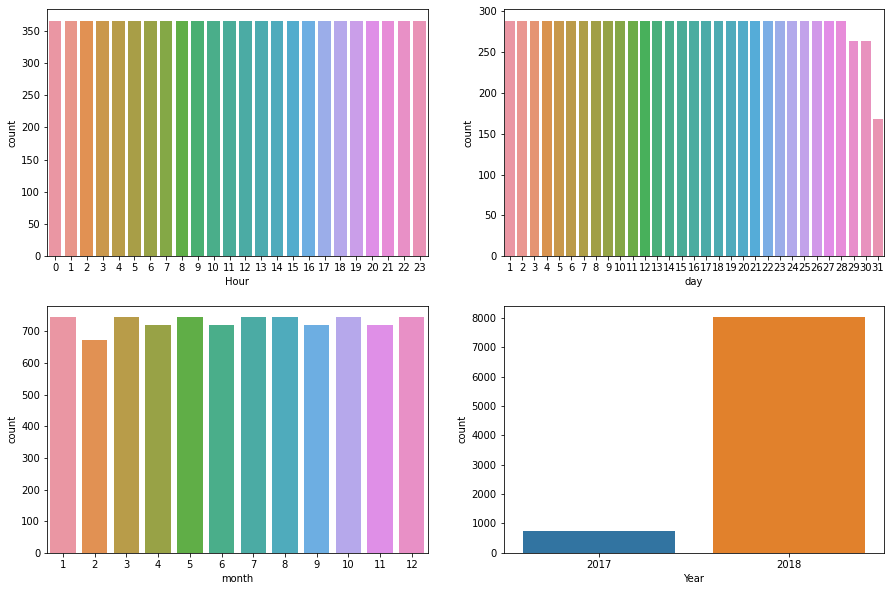

In [ ]:
#Checking the distribution of the time related features  through countplot
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1) # row2, col2, index 1
sns.countplot( x = 'Hour' , data = df)

plt.subplot(2,2,2)
sns.countplot( x = 'day' , data = df)

plt.subplot(2,2,3)
sns.countplot(x = 'month' , data = df)

plt.subplot(2,2,4)
sns.countplot( x='Year' , data = df)


In [ ]:
#As year 2017 data is very less we check how many month data is in yaer 2017
df_2017 = df[df['Year'] == 2017]
df_2017['month'].unique()

array([12])

##### 1. Why did you pick the specific chart?

To present all time related data in one frame.

##### 2. What is/are the insight(s) found from the chart?



*   Our data set contain 24 hour data starting from 0 upto 23.

*   Data set contain 31 days of data starting from 1 upto 31

*   Data set contains 12 months of data.

*   In this data set we have 2 year of data.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We gained insights that we have 2 year of data most of the data is from 2018. Now we also know in our data set we have 24 hour,31 days and 12 months data from year of 2017 and 2018.

#### Chart - 2

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day', 'month', 'Year'],
      dtype='object')

In [ ]:
# Chart - 2 visualization code
#Checking the number of unique values in 'Temperature(°C)' column
df['Temperature(°C)'].nunique()

546

<Axes: xlabel='Dew point temperature(°C)', ylabel='Count'>

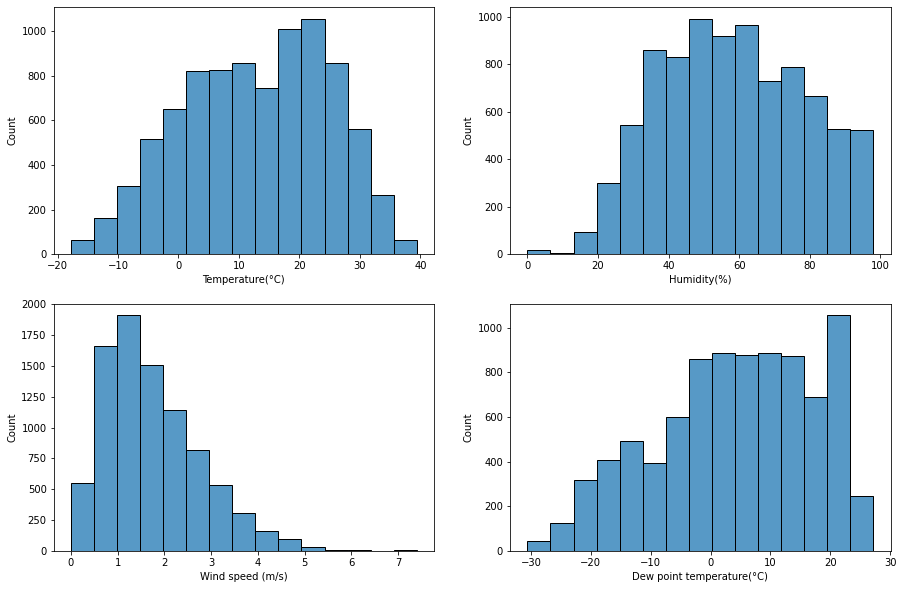

In [ ]:
#Histogram for the weather related features 'Temperature(°C)' , 'Humidity(%)' , 'Wind speed (m/s)' and 'Dew point temperature(°C)'
gif = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(df['Temperature(°C)'], bins=15)

plt.subplot(2,2,2)
sns.histplot(df['Humidity(%)'], bins = 15)

plt.subplot(2,2,3)
sns.histplot(df['Wind speed (m/s)'], bins=15)

plt.subplot(2,2,4)
sns.histplot(df['Dew point temperature(°C)'], bins = 15 )

##### 1. Why did you pick the specific chart?

To represent the weather in one frame.

##### 2. What is/are the insight(s) found from the chart?

Now we have idea of temperature, humidity, wind speed and dew point temperature what is maximum, minimum and average values.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We gained insights of weather report and its spread. It will help us study further analysis of bike demand.

#### Chart - 3

<Axes: xlabel='Functioning Day', ylabel='count'>

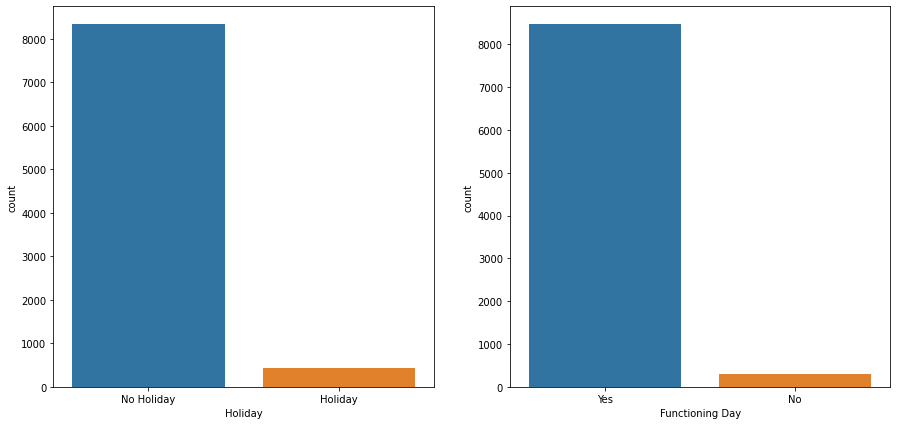

In [ ]:
# Chart - 3 visualization code
#Checking the distribution of  Holiday and Functioning Day columns
fig = plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(x = 'Holiday',data = df)

plt.subplot(1,2,2)
sns.countplot(x = 'Functioning Day', data = df)

##### 1. Why did you pick the specific chart?

To represent the holiday days and functioning days

##### 2. What is/are the insight(s) found from the chart?

In our dataset most of the data is related to working days with very less no of holidays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gained insights help us to study about the working days and count of bike demands.

#### Chart - 4

<Axes: xlabel='Seasons', ylabel='count'>

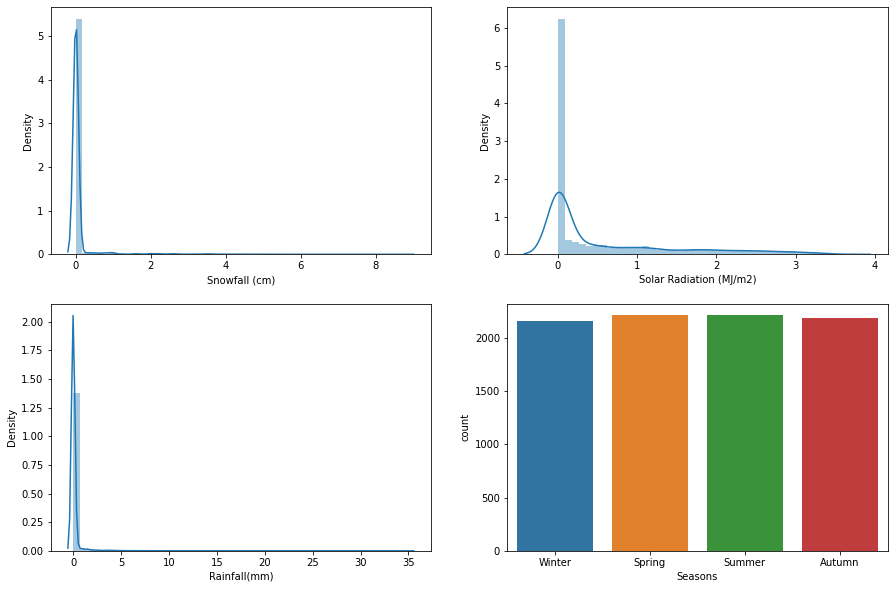

In [ ]:
# Chart - 4 visualization code
# Checking Distribution of weather related features 'Snowfall (cm)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)' , 'Seasons'
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.distplot(df['Snowfall (cm)'])

plt.subplot(2,2,2)
sns.distplot(df['Solar Radiation (MJ/m2)'])

plt.subplot(2,2,3)
sns.distplot(df['Rainfall(mm)'] )

plt.subplot(2,2,4)
sns.countplot(x = 'Seasons', data = df)

##### 1. Why did you pick the specific chart?

To represent Rainfall, Seasons, Snowfall and Solar Radiation.

##### 2. What is/are the insight(s) found from the chart?

We get the insight tha our data set has 4 weather winter,Spring,Summer and Autumn.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

## Bivariate Analysis

Bivariate analysis is the simultaneous analysis of two variables. It explores the concept of the relationship between two variable whether there exists an association and the strength of this association or whether there are differences between two variables and the significance of these differences.

#### Chart - 5

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day', 'month', 'Year'],
      dtype='object')

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

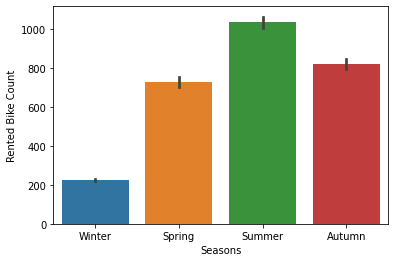

In [ ]:
# Chart - 5 visualization code
#Barplot of column 'Seasons' with 'Rented Bike Count'
sns.barplot(x = 'Seasons',y = 'Rented Bike Count' , data = df)

##### 1. Why did you pick the specific chart?

To present season with rented bike count.

##### 2. What is/are the insight(s) found from the chart?

We found that in summer season we have maximum demand of bike. In winter season we have very less no of bike  demand.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We gained insights that in summer season we have maximum number of bike demand followed by Autumn,Spring and very less demand in winter may be because low visibility or high snow or rainfall.

#### Chart - 6

<Axes: xlabel='month', ylabel='Rented Bike Count'>

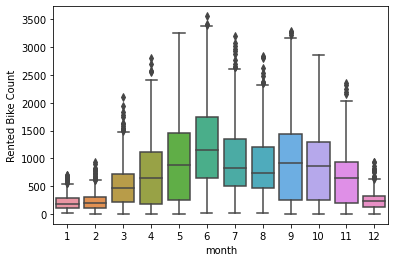

In [ ]:
# Chart - 6 visualization code
#Boxplot of 'Rented Bike Count' for each month
sns.boxplot(x = 'month',y = 'Rented Bike Count' , data = df)

##### 1. Why did you pick the specific chart?

To present month with rented bike count.

##### 2. What is/are the insight(s) found from the chart?

We find that in month of april to October we  have high no of bike in demand.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It's creating a positive impact because In the month of jan, feb and dec we have very less demand of bike due to winter except that we have high demand of bike in all season.

#### Chart - 7

In [ ]:
#Getting the count of each value in 'Year' column
df['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

<Axes: xlabel='Year', ylabel='Rented Bike Count'>

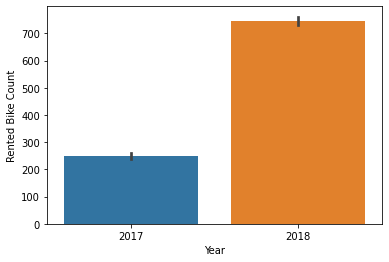

In [ ]:
# Chart - 7 visualization code
#Barplot to compare 'Rented Bike Count' in year 2017 and year 2018
sns.barplot(x = 'Year',y = 'Rented Bike Count' , data = df)

##### 1. Why did you pick the specific chart?

To represent year with rented bike count.

##### 2. What is/are the insight(s) found from the chart?

In year 2018 we have high demand of bike. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights help creating a positive impact becasue we have verry high upto 700 bike are in demand.

#### Chart - 8

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

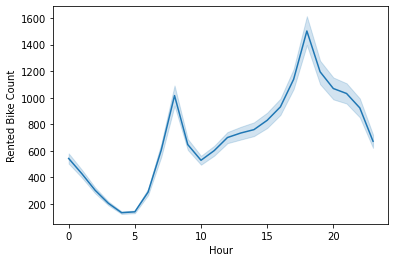

In [ ]:
#Line plot to represent   'Rented Bike Count' according to 'Hours' of the day
sns.lineplot(x = 'Hour', y = 'Rented Bike Count' , data = df)

##### 1. Why did you pick the specific chart?

To present hour with rented bike count.

##### 2. What is/are the insight(s) found from the chart?

We gain insight in morning between 5 AM to 10 AM and in evening time 3 PM to 8 PM we have high demand of bike.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gain insights help us to create positive impact because now we know the time of high bike demand we can provide sufficient supply of bike and car generate high return

### Multivariate Analysis

It is an extension of bivariate analysis which means it involves multiple variables at the same time to find correlation between them. Multivariate Analysis is a set of statistical model that examine patterns in multidimensional data by considering at once, 

#### Chart - 9

<Axes: xlabel='Year', ylabel='month'>

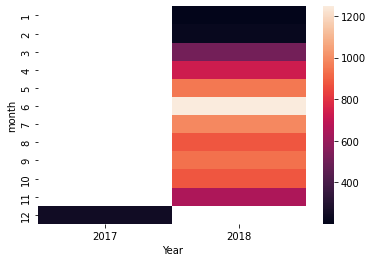

In [ ]:
# Chart - 9 visualization code
#Heatmap to show relation between month , year and the Rented Bike Count
sns.heatmap(df.pivot_table(values = 'Rented Bike Count', index='month',columns='Year'))

##### 1. Why did you pick the specific chart?

To present the relation between month, year and rented bike count.

##### 2. What is/are the insight(s) found from the chart?

In december 2017 we have very less demand of bike and same with jan and feb 2018.
After theat demand of bike is continiously increasing.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, It's creating a positive impact because we can see after 3 months bike demand is start increasing.

#### Chart - 10

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day', 'month', 'Year'],
      dtype='object')

<Axes: ylabel='Frequency'>

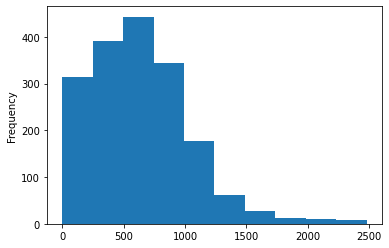

In [ ]:
# Chart - 10 visualization code
#Histogram to present average visibility with Rented Bike Count
Bike_count_and_visibilty = df.groupby(['Visibility (10m)']).mean()['Rented Bike Count'].sort_values(ascending = False)
Bike_count_and_visibilty.plot(kind='hist',bins=10)

##### 1. Why did you pick the specific chart?

To present avergae visibility with rented bike count.

##### 2. What is/are the insight(s) found from the chart?

We found that when the visibility is between 0 to 1000(10m) there is very high demand of bike.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No, It's not impacting any positive impact because as the visibility  increased upto 1500 (10m) demand is decreasing.

#### Chart - 11

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day', 'month', 'Year'],
      dtype='object')

<Axes: xlabel='Rainfall(mm)'>

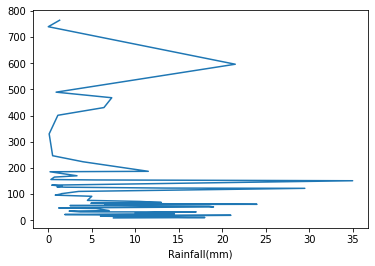

In [ ]:
# Chart - 11 visualization code
# To plot average rented bike count according to rainfall
bike_count_and_rainfall = df.groupby(['Rainfall(mm)']).mean()['Rented Bike Count'].sort_values(ascending=True)
bike_count_and_rainfall.plot(kind='line')

##### 1. Why did you pick the specific chart?

To present average rainfall with rented bike counts.

##### 2. What is/are the insight(s) found from the chart?

We found that when rainfall is inbetween  to 0 to 20 mm we have high demand of bike.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No, It's not impacting any positive impact because as the rainfall is increasing bike demand is decreasing.

#### Chart - 12

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day', 'month', 'Year'],
      dtype='object')

<Axes: xlabel='Snowfall (cm)'>

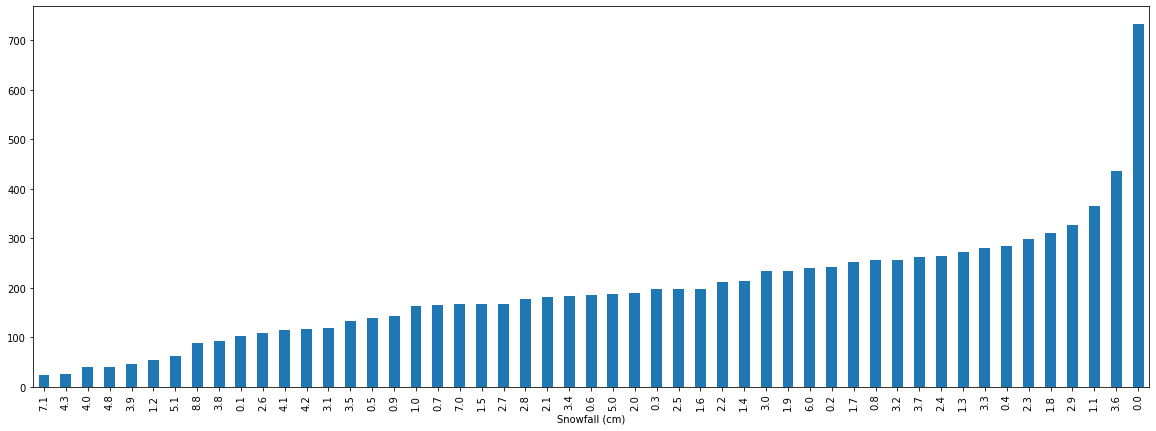

In [ ]:
# To present average Rented Bike count according to snowfall
fig = plt.figure(figsize= (20,7))
bike_count_and_snow = df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].sort_values(ascending=True)
bike_count_and_snow.plot(kind='bar')

##### 1. Why did you pick the specific chart?

To present average snowfall with rented bike counts.

##### 2. What is/are the insight(s) found from the chart?

We found that when there is no snowfall high number of bike are in demand.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No, It's not impacting any positive impact because as the snowfall is increasing bike demand is decreasing.

#### Chart - 13 

<Axes: ylabel='Frequency'>

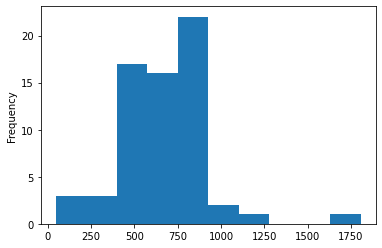

In [ ]:
# Chart - 13 visualization code
# To present average Rented Bike Count according to windspeed
bike_count_and_wind_speed = df.groupby('Wind speed (m/s)').mean()['Rented Bike Count'].sort_values(ascending=True)
bike_count_and_wind_speed.plot(kind='hist', bins=10)

##### 1. Why did you pick the specific chart?

To present average wind speed with rented bike count.

##### 2. What is/are the insight(s) found from the chart?

We found that when wind speed is in between 500 to 1000 m/s bike demand is high.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap Visualization Code
corr_matrix = round(df.corr(),2)

In [ ]:
# Correlation Heatmap visualization code
corr_matrix

Rented Bike Count  Hour  Temperature(°C)  \
Rented Bike Count                       1.00  0.41             0.54   
Hour                                    0.41  1.00             0.12   
Temperature(°C)                         0.54  0.12             1.00   
Humidity(%)                            -0.20 -0.24             0.16   
Wind speed (m/s)                        0.12  0.29            -0.04   
Visibility (10m)                        0.20  0.10             0.03   
Dew point temperature(°C)               0.38  0.00             0.91   
Solar Radiation (MJ/m2)                 0.26  0.15             0.35   
Rainfall(mm)                           -0.12  0.01             0.05   
Snowfall (cm)                          -0.14 -0.02            -0.22   
day                                     0.02  0.00             0.02   
month                                   0.13  0.00             0.22   
Year                                    0.22  0.00             0.38   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count                -0.20              0.12              0.20   
Hour                             -0.24              0.29              0.10   
Temperature(°C)                   0.16             -0.04              0.03   
Humidity(%)                       1.00             -0.34             -0.54   
Wind speed (m/s)                 -0.34              1.00              0.17   
Visibility (10m)                 -0.54              0.17              1.00   
Dew point temperature(°C)         0.54             -0.18             -0.18   
Solar Radiation (MJ/m2)          -0.46              0.33              0.15   
Rainfall(mm)                      0.24             -0.02             -0.17   
Snowfall (cm)                     0.11             -0.00             -0.12   
day                              -0.03             -0.03             -0.10   
month                             0.14             -0.16              0.06   
Year                              0.04             -0.00              0.05   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                               0.38                     0.26   
Hour                                            0.00                     0.15   
Temperature(°C)                                 0.91                     0.35   
Humidity(%)                                     0.54                    -0.46   
Wind speed (m/s)                               -0.18                     0.33   
Visibility (10m)                               -0.18                     0.15   
Dew point temperature(°C)                       1.00                     0.09   
Solar Radiation (MJ/m2)                         0.09                     1.00   
Rainfall(mm)                                    0.13                    -0.07   
Snowfall (cm)                                  -0.15                    -0.07   
day                                             0.00                    -0.00   
month                                           0.24                    -0.03   
Year                                            0.34                     0.13   

                           Rainfall(mm)  Snowfall (cm)   day  month  Year  
Rented Bike Count                 -0.12          -0.14  0.02   0.13  0.22  
Hour                               0.01          -0.02  0.00   0.00  0.00  
Temperature(°C)                    0.05          -0.22  0.02   0.22  0.38  
Humidity(%)                        0.24           0.11 -0.03   0.14  0.04  
Wind speed (m/s)                  -0.02          -0.00 -0.03  -0.16 -0.00  
Visibility (10m)                  -0.17          -0.12 -0.10   0.06  0.05  
Dew point temperature(°C)          0.13          -0.15  0.00   0.24  0.34  
Solar Radiation (MJ/m2)           -0.07          -0.07 -0.00  -0.03  0.13  
Rainfall(mm)                       1.00           0.01 -0.00   0.01  0.03  
Snowfall (cm)                      0.01     

<Axes: >

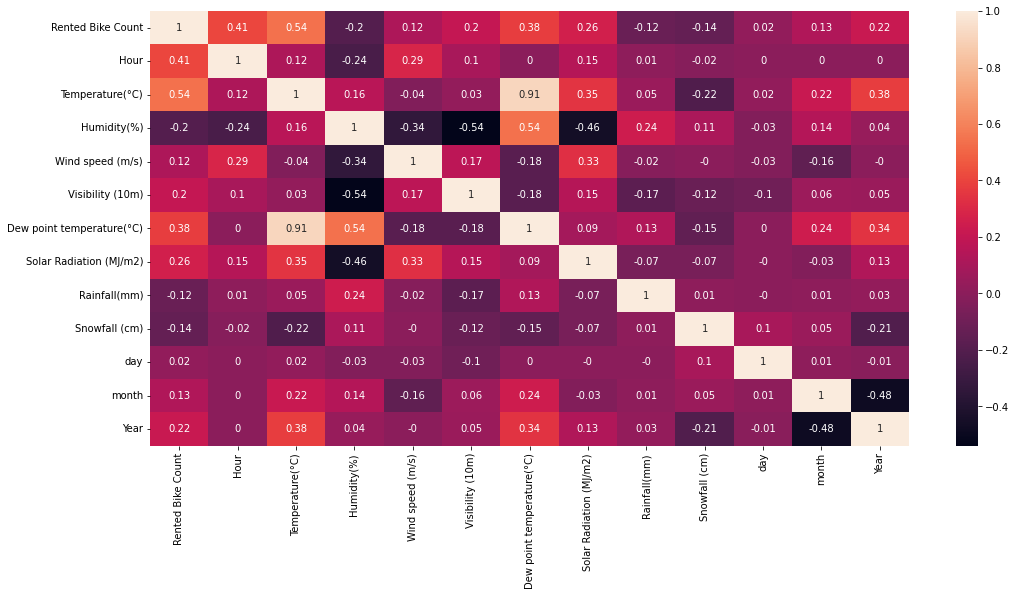

In [ ]:
#Heatmap to show correlation between variables
plt.figure(figsize=(17,8))
sns.heatmap(corr_matrix, annot=True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

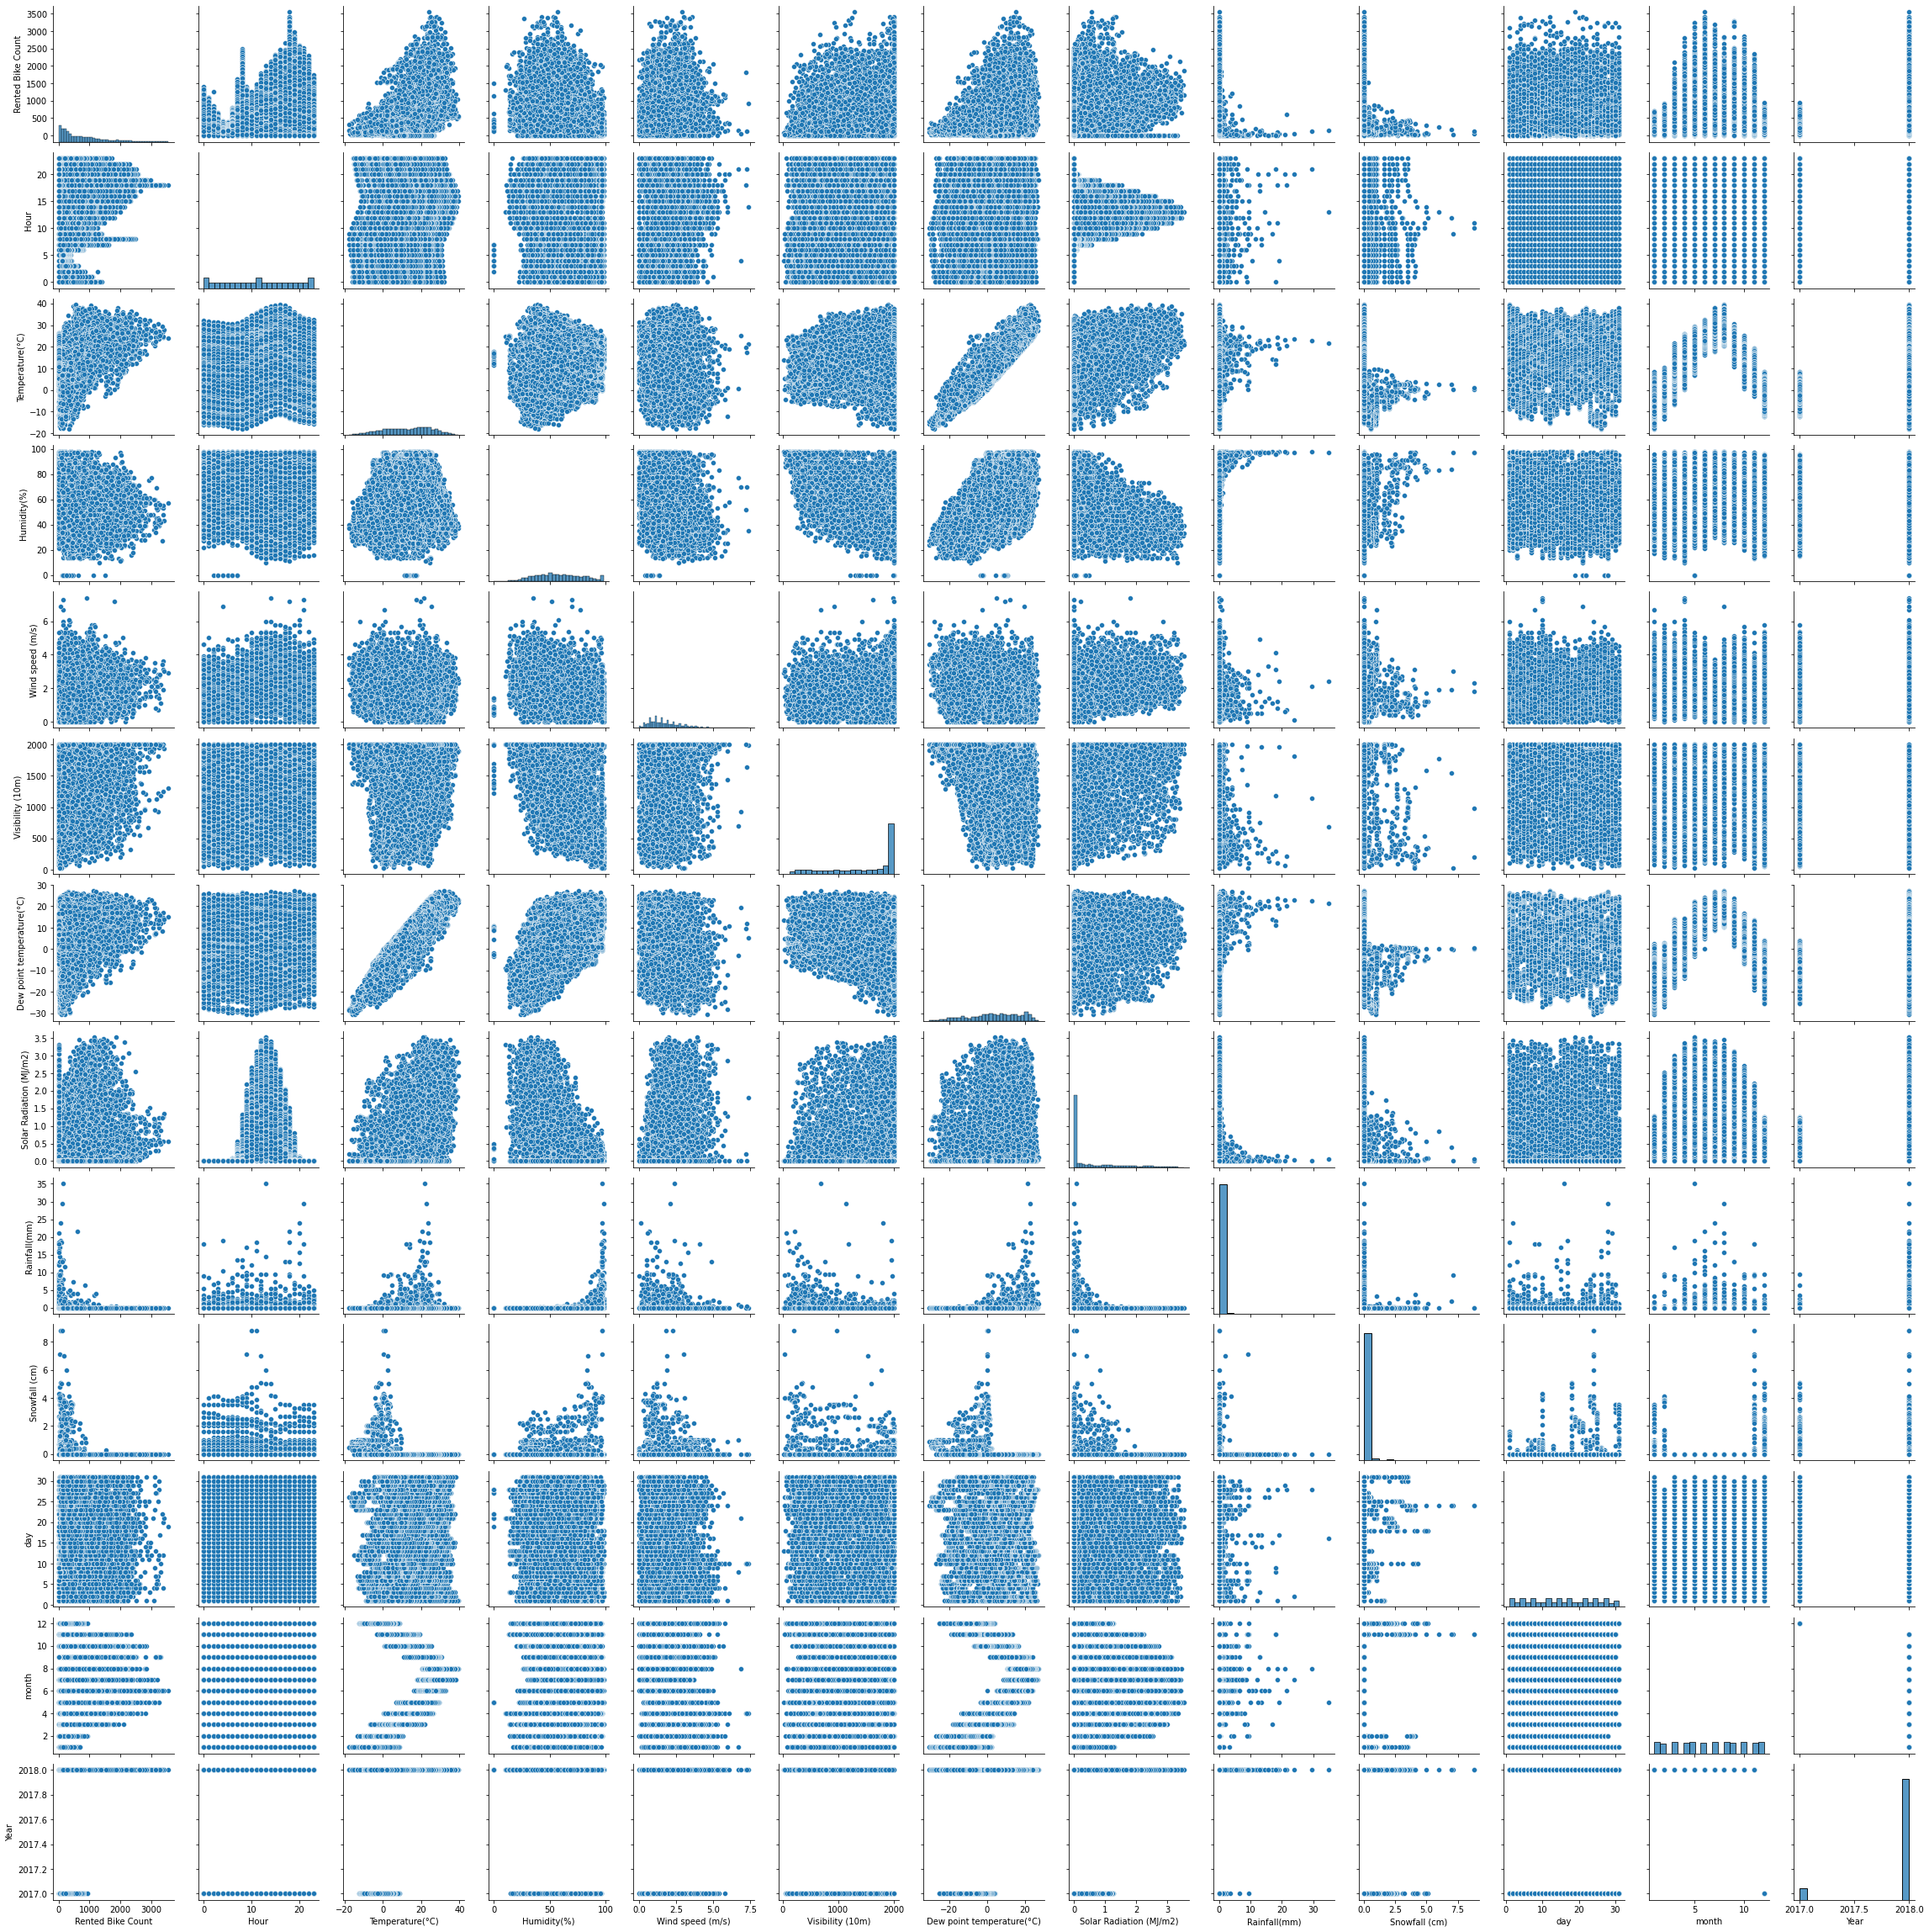

In [ ]:
# Pair Plot visualization code to represent relation between every pair of variables
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

# Conclusion


*   From the above chart we can clearly say that from the month  5 to 10 the demand of the rented bike count is high as compared to other months.These month are of summer season.
*   From above time plot we can say that in week days,demand of the bike count is higher because of the office and pick time are 7 to 9 AM and 5 to 7 PM.
*   Rented bike count in functioning days is more in use whereas on no working days bike demand are very less.
*   In Summer season the use of rented bike is high and in winter season the use of bike are very less because of snowfall.
* From the  month of April to October we  have high number of bike in demand.
* When the visibility is between 0 to 1000(10m) there is very high demand of bike.
* When rainfall is inbetween to 0 to 20 mm we have high demand of bike.
* When there is no snowfall high number of bike are in demand.
* When wind speed is in between 500 to 1000 m/s bike demand is high.



## ***5. Hypothesis Testing***

Hypothesis testing is a form of statistical inference that uses data from a sample to draw conclusions about a population parameter or a population probability distribution

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

Data of column 'Rented Bike Count' is in Normal Distribution

### Normality Test

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis : Data of column 'Rented Bike Count' is in Normal Distribution 
* Alternate  Hypothesis : Data of column 'Rented Bike Count' is not in Normal Distribution 

#### 2. Perform an appropriate statistical test.

(array([3648., 1619., 1310.,  910.,  514.,  406.,  250.,   61.,   26.,
          16.]),
 array([   0. ,  355.6,  711.2, 1066.8, 1422.4, 1778. , 2133.6, 2489.2,
        2844.8, 3200.4, 3556. ]),
 <BarContainer object of 10 artists>)

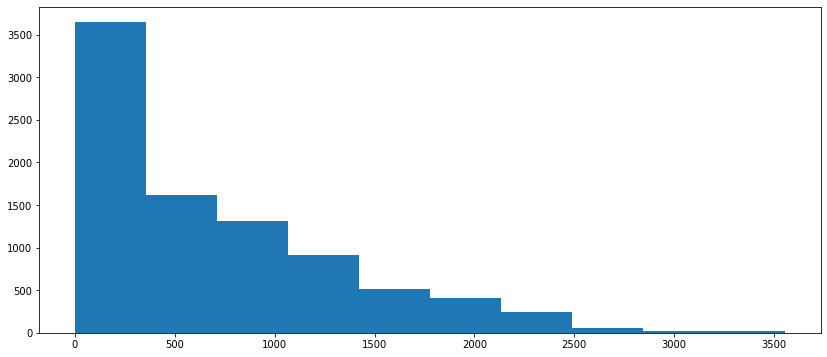

In [ ]:
# Perform Statistical Test to obtain P-Value
plt.figure(figsize=(14,6))
plt.hist(df['Rented Bike Count'])

In [ ]:
from scipy.stats import shapiro

data_to_test = df['Rented Bike Count']

stat, p = shapiro(data_to_test)

print('stat=%02f, p=%.30f' %(stat,p))

if p > 0.05:
  print('Noraml Distribution')
else:
  print('Not a Noraml Distribution')

stat=0.882219, p=0.000000000000000000000000000000
Not a Noraml Distribution


In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import normaltest

data_to_test2 = df['Rented Bike Count']

stat, p = normaltest(data_to_test2)

print('stat=%.10f, p =%.10f' %(stat, p))

if p > 0.05:
  print('Normal  Distribution')
else:
  print('Not a Noraml Distribution')

stat=1415.7332383860, p =0.0000000000
Not a Noraml Distribution


##### Which statistical test have you done to obtain P-Value?

Normality test using Shapiro-Wilk test.

Normality Test using K^2 Normality Test.

##### Why did you choose the specific statistical test?

Test if the data is normally distributed or not.

### Hypothetical Statement - 2

First 500 data of Column 'Rented Bike Count' and 'Wind Speed (m/s)' are independent sample

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis : First 500 data of Column 'Rented Bike Count' and 'Wind Speed (m/s)' are independent sample
* Alternate Hypothesis : First 500 data of Column 'Rented Bike Count' and 'Wind Speed (m/s)' are dependent sample

#### 2. Perform an appropriate statistical test.

In [ ]:
df[1:500].corr(method = 'pearson')

Rented Bike Count      Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  0.394938         0.293952   
Hour                                0.394938  1.000000         0.267525   
Temperature(°C)                     0.293952  0.267525         1.000000   
Humidity(%)                        -0.271402 -0.212086         0.289831   
Wind speed (m/s)                    0.063007  0.126611         0.000941   
Visibility (10m)                    0.189339  0.132342        -0.450859   
Dew point temperature(°C)          -0.010858  0.012375         0.756633   
Solar Radiation (MJ/m2)             0.191836  0.125492         0.223826   
Rainfall(mm)                       -0.145976 -0.049272         0.084216   
Snowfall (cm)                      -0.317726 -0.026066         0.108459   
day                                -0.374232 -0.025079        -0.377417   
month                                    NaN       NaN              NaN   
Year                                     NaN       NaN              NaN   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count            -0.271402          0.063007          0.189339   
Hour                         -0.212086          0.126611          0.132342   
Temperature(°C)               0.289831          0.000941         -0.450859   
Humidity(%)                   1.000000         -0.360094         -0.835030   
Wind speed (m/s)             -0.360094          1.000000          0.286838   
Visibility (10m)             -0.835030          0.286838          1.000000   
Dew point temperature(°C)     0.837128         -0.250660         -0.800729   
Solar Radiation (MJ/m2)      -0.443908          0.339837          0.198507   
Rainfall(mm)                  0.213374         -0.054661         -0.233952   
Snowfall (cm)                 0.449992         -0.164658         -0.440091   
day                          -0.014250         -0.042773         -0.049807   
month                              NaN               NaN               NaN   
Year                               NaN               NaN               NaN   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                          -0.010858                 0.191836   
Hour                                        0.012375                 0.125492   
Temperature(°C)                             0.756633                 0.223826   
Humidity(%)                                 0.837128                -0.443908   
Wind speed (m/s)                           -0.250660                 0.339837   
Visibility (10m)                           -0.800729                 0.198507   
Dew point temperature(°C)                   1.000000                -0.202135   
Solar Radiation (MJ/m2)                    -0.202135                 1.000000   
Rainfall(mm)                                0.178232                -0.071981   
Snowfall (cm)                               0.346886                -0.068690   
day                                        -0.220791                -0.007286   
month                                            NaN                      NaN   
Year                                             NaN                      NaN   

                           Rainfall(mm)  Snowfall (cm)       day  month  Year  
Rented Bike Count             -0.145976      -0.317726 -0.374232    NaN   NaN  
Hour                          -0.049272      -0.026066 -0.025079    NaN   NaN  
Temperature(°C)                0.084216       0.108459 -0.377417    NaN   NaN  
Humidity(%)                    0.213374       0.449992 -0.014250    NaN   NaN  
Wind speed (m/s)              -0.054661      -0.164658 -0.042773    NaN   NaN  
Visibility (10m)              -0.233952      -0.440091 -0.049807    NaN   NaN  
Dew point temperature(°C)      0.178232       0.346886 -0.220791    NaN   NaN  
Solar Radiation (MJ/m2)       -0.071981      -0.068690 -0.007286    NaN   NaN  
Rainfall(mm)                

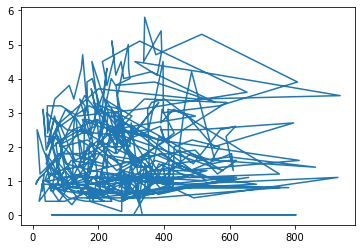

In [ ]:
# Perform Statistical Test to obtain P-Value
first_sample = df[1:500]['Rented Bike Count']
second_sample = df[1:500]['Wind speed (m/s)']
plt.plot(first_sample, second_sample)
plt.show()

In [ ]:
from scipy.stats import spearmanr

stat, p = spearmanr(first_sample, second_sample)

print('stat = %.3f, p=%5f' %(stat, p))

if p > 0.05:
  print('Independent sample')
else:
  print('dependent sample')


stat = 0.073, p=0.102164
Independent sample


In [ ]:
from scipy.stats import pearsonr

stat, p = pearsonr(first_sample, second_sample)

print('stat = %.3f, p=%5f' %(stat, p))

if p > 0.05:
  print('Independent sample')
else:
  print('dependent sample')


stat = 0.063, p=0.159924
Independent sample


In [ ]:
#Test whether two category variable are related or independent.
df.head(5)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  day  \
0           0.0            0.0  Winter  No Holiday             Yes    1   
1           0.0            0.0  Winter  No Holiday             Yes    1   
2           0.0            0.0  Winter  No Holiday             Yes    1   
3           0.0            0.0  Winter  No Holiday             Yes    1   
4           0.0            0.0  Winter  No Holiday             Yes    1   

   month  Year  
0     12  2017  
1     12  2017  
2     12  2017  
3     12  2017  
4     12  2017

##### Which statistical test have you done to obtain P-Value?

Correlation Test - Pearson and Spearman's Rank Correlation

##### Why did you choose the specific statistical test?

To test correlation between samples

### Hypothetical Statement - 3

The variables 'Seasons' and 'Holiday' are dependent

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis : The variables 'Seasons' and 'Holiday' are dependent
* Alternate hypothesis : The variables 'Seasons' and 'Holiday' are independent 

#### 2. Perform an appropriate statistical test.

In [ ]:
#Test whether two category variable are related or independent.
df.head(5)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  day  \
0           0.0            0.0  Winter  No Holiday             Yes    1   
1           0.0            0.0  Winter  No Holiday             Yes    1   
2           0.0            0.0  Winter  No Holiday             Yes    1   
3           0.0            0.0  Winter  No Holiday             Yes    1   
4           0.0            0.0  Winter  No Holiday             Yes    1   

   month  Year  
0     12  2017  
1     12  2017  
2     12  2017  
3     12  2017  
4     12  2017

In [ ]:
contingency_data = pd.crosstab(df['Seasons'], df['Holiday'], margins = False)

In [ ]:
contingency_data

Holiday  Holiday  No Holiday
Seasons                     
Autumn       120        2064
Spring        72        2136
Summer        48        2160
Winter       192        1968

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
stat, p, dof, excepted = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f'%(stat, p))

if p >0.05:
  print('dependent variable')
else:
  print('independt variables')

stat=122.587, p=0.000
independt variables


##### Which statistical test have you done to obtain P-Value?

Correlation of categorical variable - Chi square test

##### Why did you choose the specific statistical test?

Test the data features dependent to each other or not.

### Other statistical tests like parametric, Non-parametric, stationarity test

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day', 'month', 'Year'],
      dtype='object')

In [ ]:
# T-Test
bike_count_mean = df['Rented Bike Count'].mean()
print(bike_count_mean)

704.6020547945205


In [ ]:
bike_count =df['Rented Bike Count']
bike_count

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

In [ ]:
#One sample t test
import scipy
scipy.stats.ttest_1samp(bike_count,700)

TtestResult(statistic=0.6677990990403843, pvalue=0.504279436353667, df=8759)

In [ ]:
wind_speed = df['Wind speed (m/s)']

In [ ]:
# Independent t test
scipy.stats.ttest_ind(wind_speed,bike_count)

Ttest_indResult(statistic=-101.99359634851933, pvalue=0.0)

In [ ]:
#paire sample t test
from scipy import stats
stats.ttest_rel(df['Rented Bike Count'],df['Wind speed (m/s)'])

TtestResult(statistic=102.01344817591426, pvalue=0.0, df=8759)

In [ ]:
from scipy.stats.stats import F_onewayResult
# Anova test
#Assumption - Normal distribution, same variance, identical distribution

from scipy.stats import f_oneway

F_onewayResult(df['Rented Bike Count'],df['Wind speed (m/s)'])

F_onewayResult(statistic=0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64, pvalue=0       2.2
1       0.8
2       1.0
3       0.9
4       2.3
       ... 
8755    2.6
8756    2.3
8757    0.3
8758    1.0
8759    1.3
Name: Wind speed (m/s), Length: 8760, dtype: float64)

In [ ]:
tstat, p =scipy.stats.mannwhitneyu(df['Rented Bike Count'],df['Solar Radiation (MJ/m2)'])
print('stat=%.3f,p=%.3f' %(stat, p))

if p > 0.05:
  print('Same Distribution')
else:
  print('Differnt Distribution')

stat=122.587,p=0.000
Differnt Distribution


##### Which statistical test have you done to obtain P-Value?

I have done different types of statistical test to obtain P_ values like shapiro,normaltest,spearmanr,pearsonr,chi2_contingency,f_oneway,mannwhitneyu.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
day                          0
month                        0
Year                         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

As we can see there is no null value so we dont need to perform null value imputation.

### 2. Handling Outliers

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

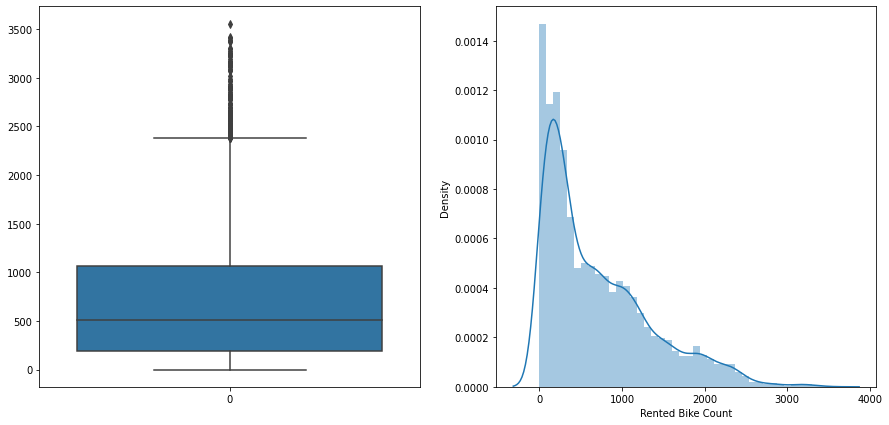

In [ ]:
# Handling Outliers & Outlier treatments
fig = plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.boxplot(df['Rented Bike Count'])

plt.subplot(1,2,2)
sns.distplot(df['Rented Bike Count'])

In [ ]:
df['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

Z -Score method

In [ ]:
# find upper limit and lower limit
upper_limit = df['Rented Bike Count'].mean() + 3*df['Rented Bike Count'].std()
lower_limit = df['Rented Bike Count'].mean() - 3*df['Rented Bike Count'].std()
print('Upper Limit :', upper_limit)
print('Lower Limit :', lower_limit)

Upper Limit : 2639.5944580121673
Lower Limit : -1230.3903484231264


In [ ]:
# finding outliers
df.loc[(df['Rented Bike Count'] > upper_limit) | (df['Rented Bike Count'] < lower_limit)]

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
3282               2692    18             17.0           28               3.1   
3498               2807    18             21.2           32               3.8   
3714               2661    18             17.1           35               3.4   
3834               3130    18             20.6           41               2.3   
3882               2701    18             17.9           37               3.1   
...                 ...   ...              ...          ...               ...   
6978               3277    18             25.3           56               2.8   
7218               3154    18             22.5           38               0.8   
7314               2857    18             16.6           61               2.9   
7482               2787    18             18.1           39               1.0   
7674               2716    18             16.9           47               1.4   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
3282              2000                       -1.6                     0.88   
3498              1927                        3.8                     0.94   
3714              1961                        1.4                     1.11   
3834              2000                        6.8                     1.10   
3882              1819                        2.9                     0.36   
...                ...                        ...                      ...   
6978              1992                       15.8                     0.54   
7218              2000                        7.4                     0.31   
7314              2000                        9.0                     0.16   
7482              2000                        3.9                     0.21   
7674              1637                        5.5                     0.11   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  day  \
3282           0.0            0.0  Spring  No Holiday             Yes   16   
3498           0.0            0.0  Spring  No Holiday             Yes   25   
3714           0.0            0.0  Spring  No Holiday             Yes    4   
3834           0.0            0.0  Spring  No Holiday             Yes    9   
3882           0.0            0.0  Spring  No Holiday             Yes   11   
...            ...            ...     ...         ...             ...  ...   
6978           0.0            0.0  Autumn  No Holiday             Yes   17   
7218           0.0            0.0  Autumn  No Holiday             Yes   27   
7314           0.0            0.0  Autumn  No Holiday             Yes    1   
7482           0.0            0.0  Autumn  No Holiday             Yes    8   
7674           0.0            0.0  Autumn  No Holiday             Yes   16   

      month  Year  
3282      4  2018  
3498      4  2018  
3714      5  2018  
3834      5  2018  
3882      5  2018  
...     ...   ...  
6978      9  2018  
7218      9  2018  
7314     10  2018  
7482     10  2018  
7674     10  2018  

[67 rows x 16 columns]

In [ ]:
#triming -  deleting the outliers data
new_df = df.loc[(df['Rented Bike Count'] < upper_limit) & (df['Rented Bike Count'] > lower_limit)]
print('Before removing outliers',len(df))
print('After removing outlier',len(new_df))
print('Outlier',len(df)-len(new_df))

Before removing outliers 8760
After removing outlier 8693
Outlier 67


<Axes: xlabel='Rented Bike Count', ylabel='Density'>

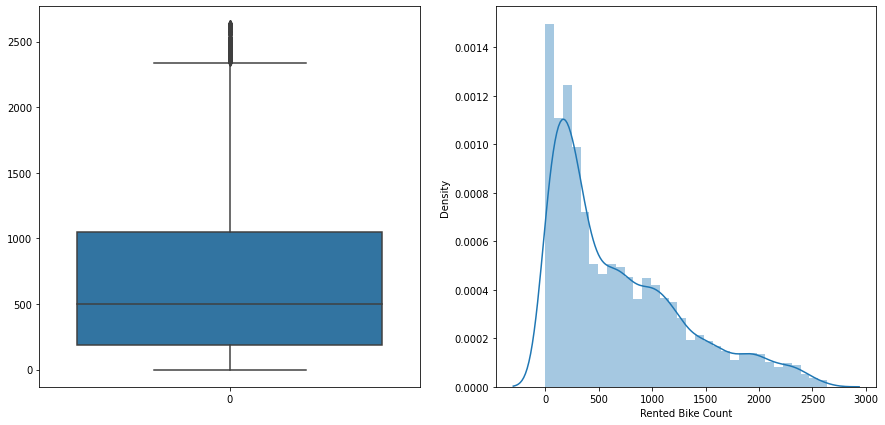

In [ ]:
# After removng outlier with the help of z score
fig = plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.boxplot(new_df['Rented Bike Count'])

plt.subplot(1,2,2)
sns.distplot(new_df['Rented Bike Count'])

In [ ]:
#capping - change the outlier values to upper(or) lower limit value
new_df = df.copy()
new_df.loc[(new_df['Rented Bike Count'] > upper_limit),'Rented Bike Count'] = upper_limit
new_df.loc[(new_df['Rented Bike Count'] < lower_limit),'Rented Bike count'] = lower_limit

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

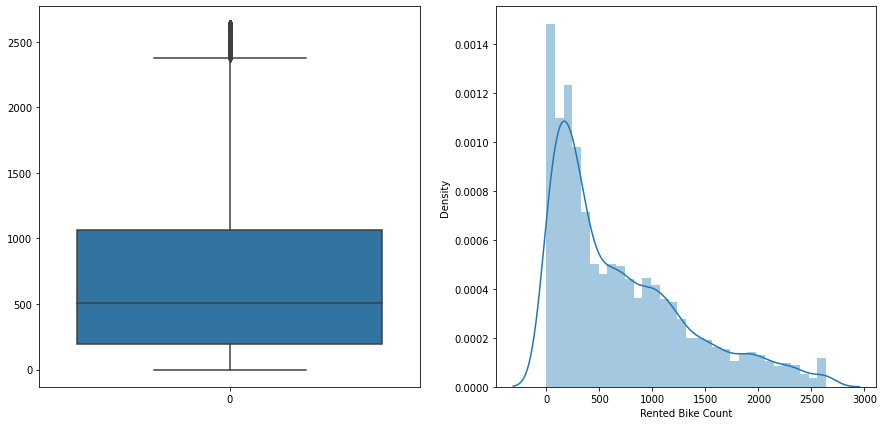

In [ ]:
# After capping outlier with the help of z score
fig = plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.boxplot(new_df['Rented Bike Count'])

plt.subplot(1,2,2)
sns.distplot(new_df['Rented Bike Count'])

## IQR method

In [ ]:
#Getting the Interquartile Range
q1 = df['Rented Bike Count'].quantile(0.25)
q3 = df['Rented Bike Count'].quantile(0.75)
iqr = q3 - q1

In [ ]:
q1, q3, iqr

(191.0, 1065.25, 874.25)

In [ ]:
upper_limit_iqr = q3 + (1.5 * iqr)
lower_limit_iqr = q1 - (1.5 * iqr)
lower_limit_iqr, upper_limit_iqr

(-1120.375, 2376.625)

In [ ]:
#triming - deleting the outlier data
new_df_iqr = df.loc[(df['Rented Bike Count']< upper_limit_iqr) & (df['Rented Bike Count'] > lower_limit_iqr)]
print('Before Removing Outlier :',len(df))
print('After Removing Outlier :', len(new_df_iqr))
print('Outlier :', len(df) - len(new_df_iqr))

Before Removing Outlier : 8760
After Removing Outlier : 8602
Outlier : 158


<Axes: xlabel='Rented Bike Count', ylabel='Density'>

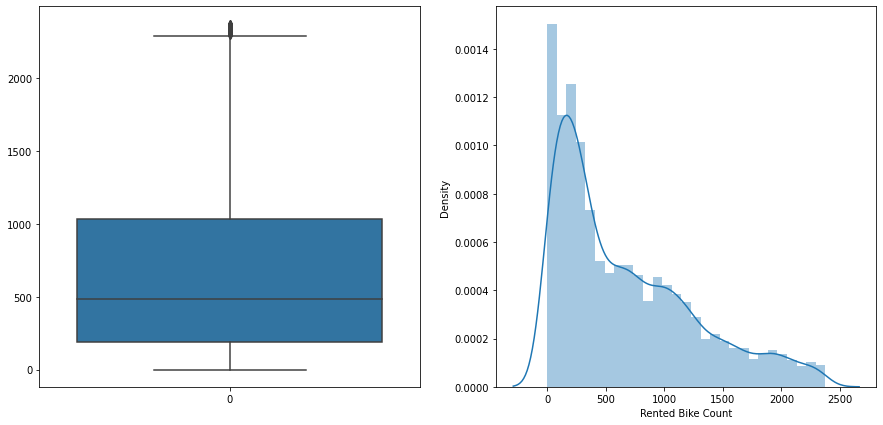

In [ ]:
from pandas.core.internals.managers import new_block
fig = plt.figure(figsize = (15,7))

plt.subplot(1,2,1)
sns.boxplot(new_df_iqr['Rented Bike Count'])

plt.subplot(1,2,2)
sns.distplot(new_df_iqr['Rented Bike Count'])

In [ ]:
# capping - chnage the outlier values to upper or lower limit
new_df_iqr = df.copy()
new_df_iqr.loc[(new_df_iqr['Rented Bike Count']> upper_limit_iqr), 'Rented Bike Count'] = upper_limit_iqr
new_df_iqr.loc[(new_df_iqr['Rented Bike Count']< lower_limit_iqr), 'Rented Bike Count'] = lower_limit_iqr

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

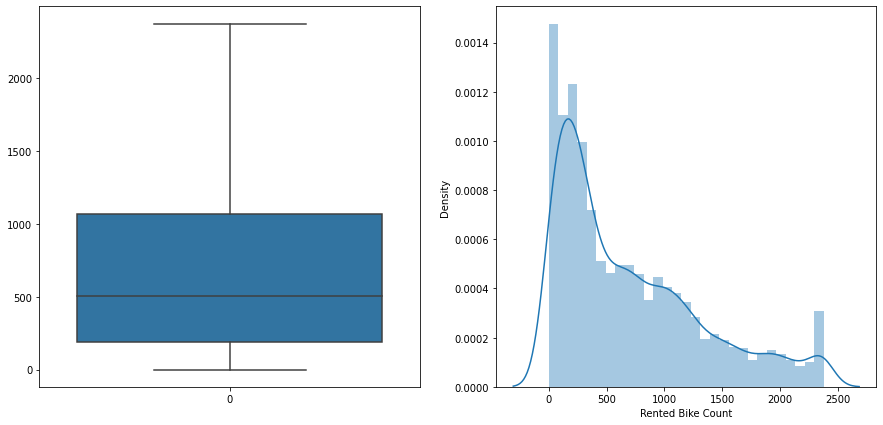

In [ ]:
fig = plt.figure(figsize = (15,7))

plt.subplot(1,2,1)
sns.boxplot(new_df_iqr['Rented Bike Count'])

plt.subplot(1,2,2)
sns.distplot(new_df_iqr['Rented Bike Count'])

Percentile method

In [ ]:
upper_limit_per = df['Rented Bike Count'].quantile(0.99)
lower_limit_per = df['Rented Bike Count'].quantile(0.01)
print('Upper Limit :', upper_limit_per)
print('Lower Limit :', lower_limit_per) 

Upper Limit : 2526.2299999999996
Lower Limit : 0.0


In [ ]:
#find the outliers
df.loc[(df['Rented Bike Count'] > upper_limit_per) | (df['Rented Bike Count']< lower_limit_per)]

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
3282               2692    18             17.0           28               3.1   
3498               2807    18             21.2           32               3.8   
3522               2574    18             17.4           45               3.1   
3546               2577    18             20.3           47               2.5   
3618               2558    18             23.0           54               2.9   
...                 ...   ...              ...          ...               ...   
7674               2716    18             16.9           47               1.4   
7746               2631    18             16.6           40               2.4   
7818               2613    18             17.3           43               0.9   
7866               2612    18             15.1           53               1.7   
7890               2632    18             17.3           39               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
3282              2000                       -1.6                     0.88   
3498              1927                        3.8                     0.94   
3522              1092                        5.3                     0.75   
3546               705                        8.6                     0.77   
3618               679                       13.1                     0.81   
...                ...                        ...                      ...   
7674              1637                        5.5                     0.11   
7746              2000                        2.9                     0.11   
7818               783                        4.5                     0.08   
7866              2000                        5.5                     0.06   
7890              1641                        3.1                     0.03   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  day  \
3282           0.0            0.0  Spring  No Holiday             Yes   16   
3498           0.0            0.0  Spring  No Holiday             Yes   25   
3522           0.0            0.0  Spring  No Holiday             Yes   26   
3546           0.0            0.0  Spring  No Holiday             Yes   27   
3618           0.0            0.0  Spring  No Holiday             Yes   30   
...            ...            ...     ...         ...             ...  ...   
7674           0.0            0.0  Autumn  No Holiday             Yes   16   
7746           0.0            0.0  Autumn  No Holiday             Yes   19   
7818           0.0            0.0  Autumn  No Holiday             Yes   22   
7866           0.0            0.0  Autumn  No Holiday             Yes   24   
7890           0.0            0.0  Autumn  No Holiday             Yes   25   

      month  Year  
3282      4  2018  
3498      4  2018  
3522      4  2018  
3546      4  2018  
3618      4  2018  
...     ...   ...  
7674     10  2018  
7746     10  2018  
7818     10  2018  
7866     10  2018  
7890     10  2018  

[88 rows x 16 columns]

In [ ]:
# triming - deleting the outlier data
new_df_per = df.loc[(df['Rented Bike Count']<upper_limit_per) & (df['Rented Bike Count']> lower_limit_per)]
print('Before removing outlier', len(df))
print('After removing outlier', len(new_df_per))
print('Outlier', len(df)- len(new_df_per))

Before removing outlier 8760
After removing outlier 8377
Outlier 383


<Axes: xlabel='Rented Bike Count', ylabel='Density'>

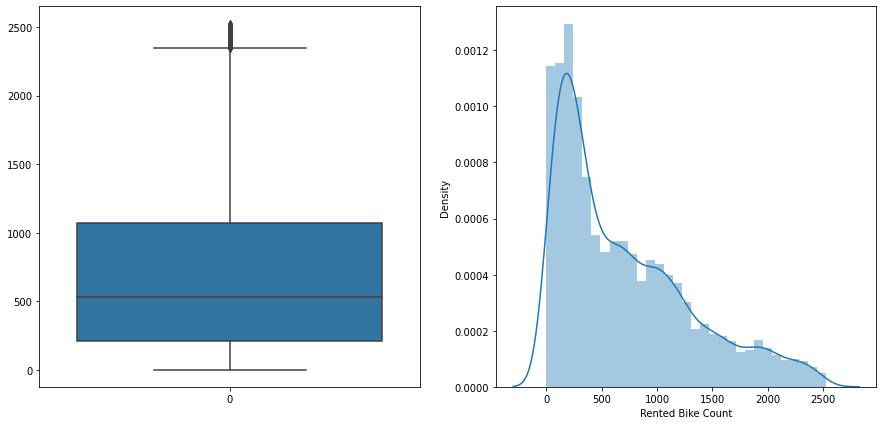

In [ ]:
fig = plt.figure(figsize = (15,7))

plt.subplot(1,2,1)
sns.boxplot(new_df_per['Rented Bike Count'])

plt.subplot(1,2,2)
sns.distplot(new_df_per['Rented Bike Count'])

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

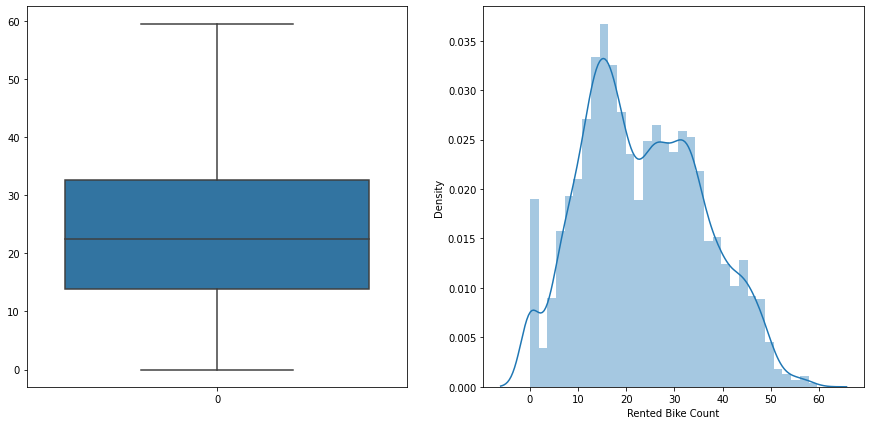

In [ ]:
fig = plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.boxplot(np.sqrt(df['Rented Bike Count']))

plt.subplot(1,2,2)
sns.distplot(np.sqrt(df['Rented Bike Count']))

##### What all outlier treatment techniques have you used and why did you use those techniques?

I use Z-score, IQR and percentile all three techniques to get the best result.The best result is obtained by applying square root which removes the outliers totally

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
df.head(5)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  day  \
0           0.0            0.0  Winter  No Holiday             Yes    1   
1           0.0            0.0  Winter  No Holiday             Yes    1   
2           0.0            0.0  Winter  No Holiday             Yes    1   
3           0.0            0.0  Winter  No Holiday             Yes    1   
4           0.0            0.0  Winter  No Holiday             Yes    1   

   month  Year  
0     12  2017  
1     12  2017  
2     12  2017  
3     12  2017  
4     12  2017

In [ ]:
df.dtypes

Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
day                            int64
month                          int64
Year                           int64
dtype: object

In [ ]:
df_category = list(df.select_dtypes(['object','category']).columns)
df_category = pd.Index(df_category)
df_category

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [ ]:
## Encoding categorical variables through One Hot Encoding technique 
df_copy = df.copy()

def one_hot_encoding(data, column):
  data = pd.concat([data, pd.get_dummies(data[column],prefix = column, drop_first = True)],axis = 1)
  data = data.drop([column], axis = 1)
  return data

for col in df_category:
  df_copy = one_hot_encoding(df_copy, col)
new_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0              254.0     0             -5.2           37               2.2   
1              204.0     1             -5.5           38               0.8   
2              173.0     2             -6.0           39               1.0   
3              107.0     3             -6.2           40               0.9   
4               78.0     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  day  \
0           0.0            0.0  Winter  No Holiday             Yes    1   
1           0.0            0.0  Winter  No Holiday             Yes    1   
2           0.0            0.0  Winter  No Holiday             Yes    1   
3           0.0            0.0  Winter  No Holiday             Yes    1   
4           0.0            0.0  Winter  No Holiday             Yes    1   

   month  Year  Rented Bike count  
0     12  2017                NaN  
1     12  2017                NaN  
2     12  2017                NaN  
3     12  2017                NaN  
4     12  2017                NaN

In [ ]:
df_copy.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'day',
       'month', 'Year', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

Here I am using one hot encoding technique to using pandas dummies function to convert categorical feature into numerical features.

Season, Holiday, Functioning Day are the categorical features and as we know machine learning algorithms not accept categorical feature so we have to convert it into numerical form.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation and Feature Selection

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

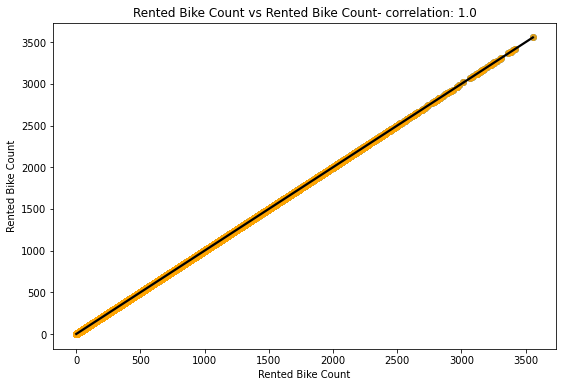

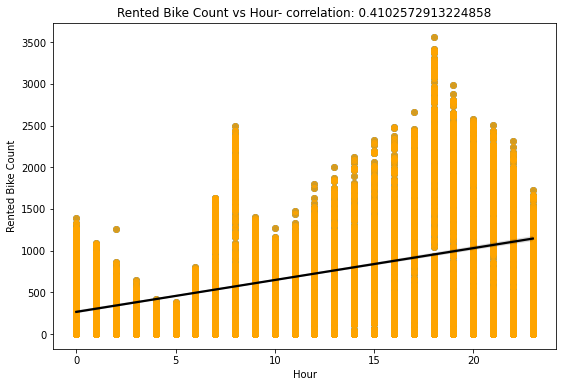

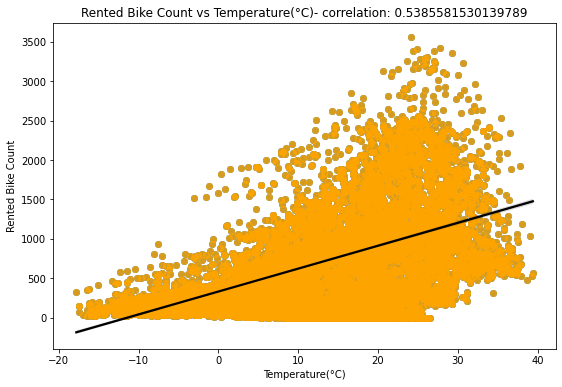

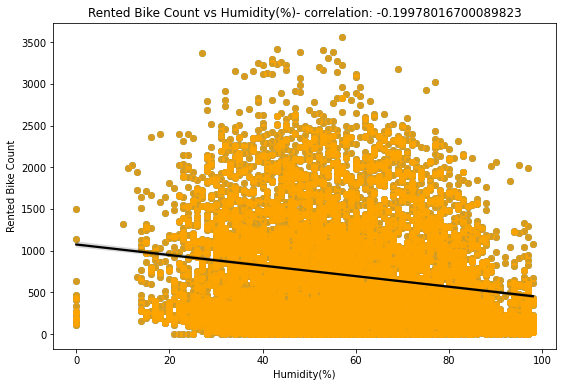

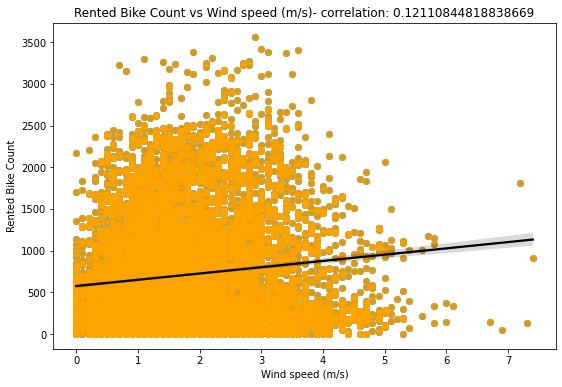

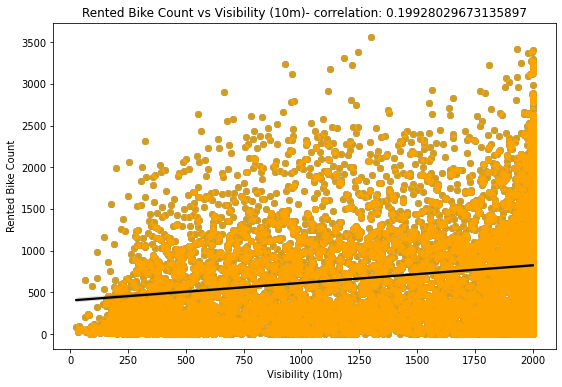

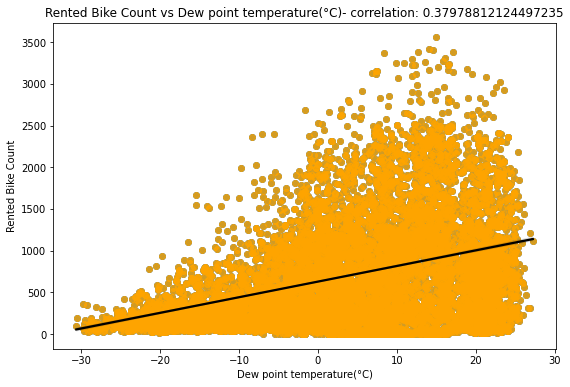

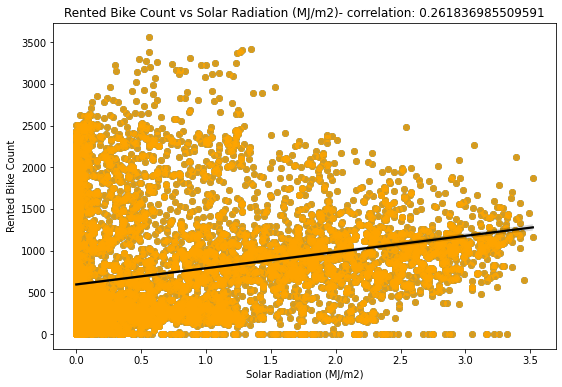

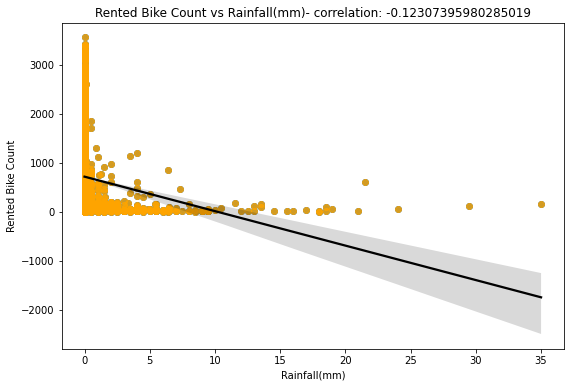

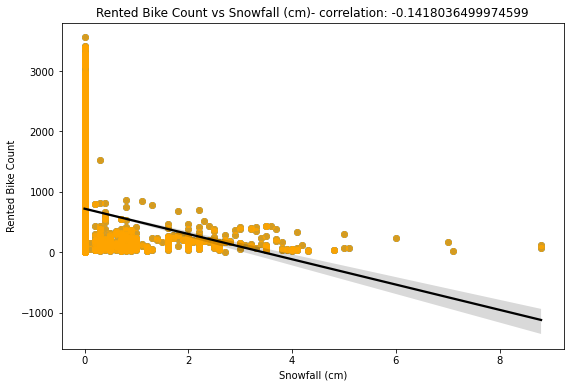

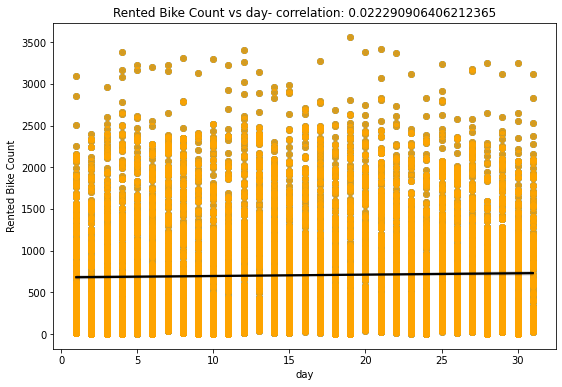

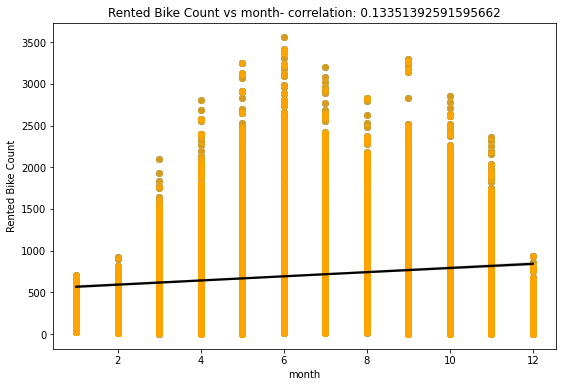

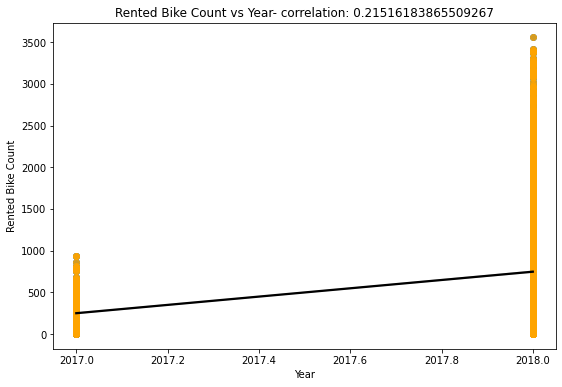

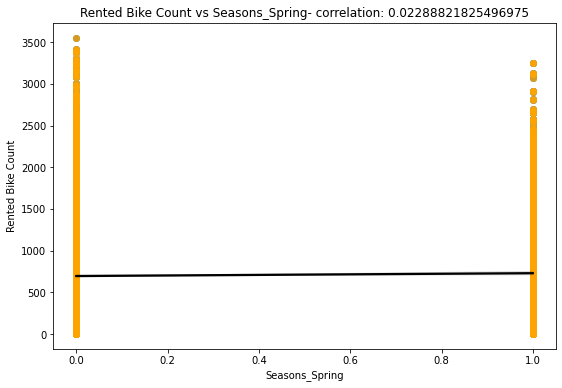

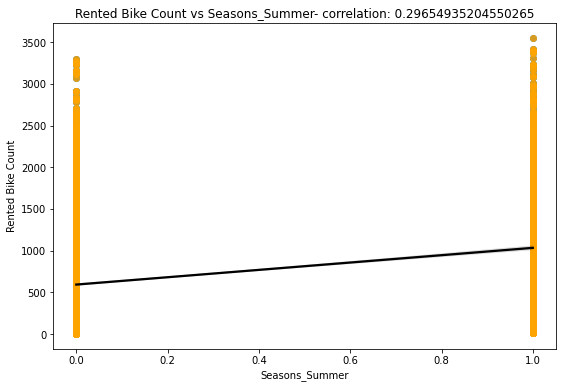

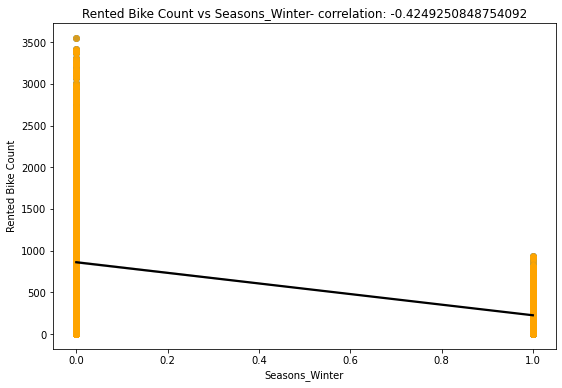

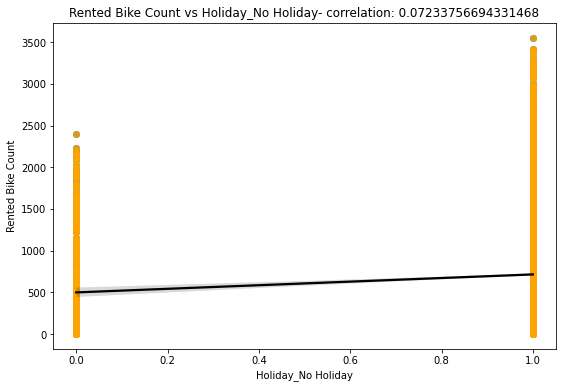

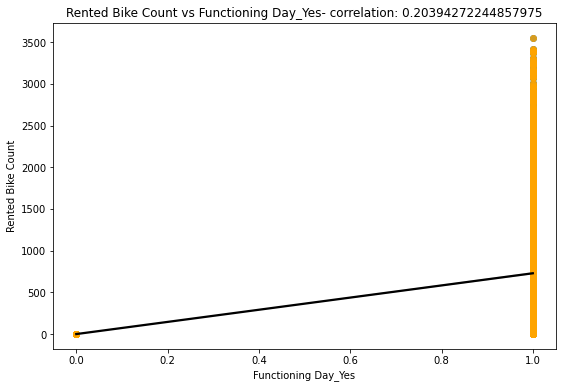

In [ ]:
#Testing the correlation between variables through regression plot
for col in df_copy:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_copy[col]
    label = df_copy['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    sns.regplot(x=df_copy[col],y=df_copy['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})
plt.show()

<Axes: >

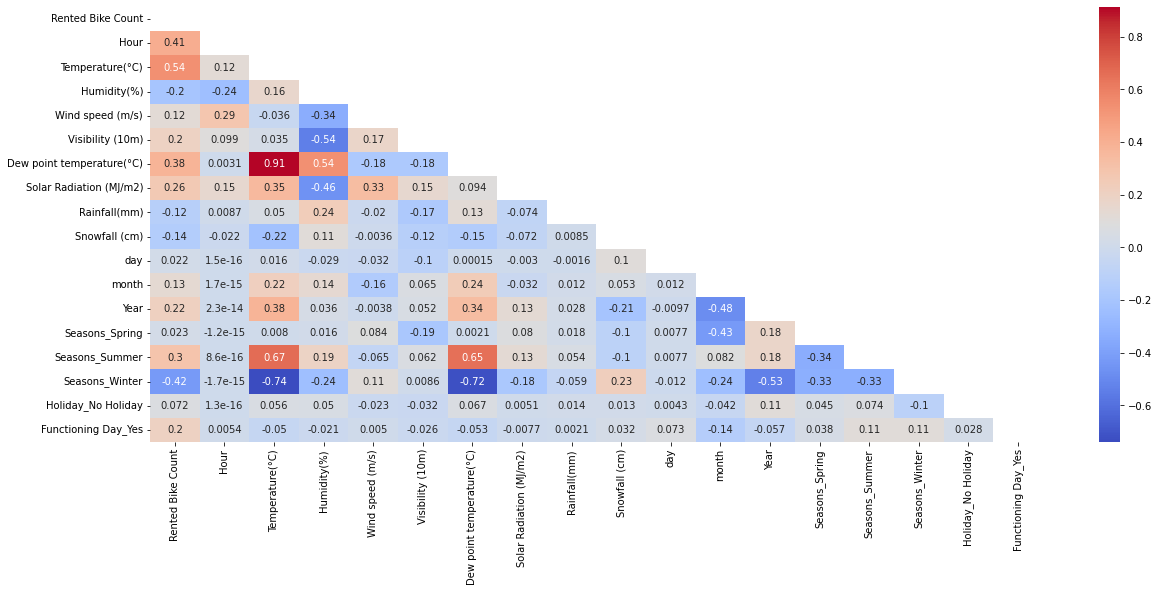

In [ ]:
# Correlation Heatmap to see the correlation between variables
plt.figure(figsize=(20,8))
correlation = df_copy.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation), mask= mask, annot=True, cmap='coolwarm')

In [ ]:
df_copy.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'day',
       'month', 'Year', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes'],
      dtype='object')

In [ ]:
#Dropping the 'Temperature(°C)' as it is highly correlated to 'Dew point temperature(°C)'
df_copy = df_copy.drop(['Temperature(°C)'], axis=1)

In [ ]:
df_copy.columns


Index(['Rented Bike Count', 'Hour', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'day',
       'month', 'Year', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes'],
      dtype='object')

##### What all feature selection methods have you used  and why?

Here we are trying to find the relation of each independent features with dependent feature by ploting regression plot and heatmap.

##### Which all features you found important and why?

Here we found that Dew Point temperature and temperature is highly corelated with each other so we drop dew point temperature to reduce collinearity.

### 6. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Create the data of independent variables
X = df_copy.drop(columns = ['Rented Bike Count'],axis = 1)
#Create the data of dependent variables
y = np.sqrt(df_copy['Rented Bike Count'])

In [ ]:
X.head()

Hour  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0     0           37               2.2              2000   
1     1           38               0.8              2000   
2     2           39               1.0              2000   
3     3           40               0.9              2000   
4     4           36               2.3              2000   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                      -17.6                      0.0           0.0   
1                      -17.6                      0.0           0.0   
2                      -17.7                      0.0           0.0   
3                      -17.6                      0.0           0.0   
4                      -18.6                      0.0           0.0   

   Snowfall (cm)  day  month  Year  Seasons_Spring  Seasons_Summer  \
0            0.0    1     12  2017               0               0   
1            0.0    1     12  2017               0               0   
2            0.0    1     12  2017               0               0   
3            0.0    1     12  2017               0               0   
4            0.0    1     12  2017               0               0   

   Seasons_Winter  Holiday_No Holiday  Functioning Day_Yes  
0               1                   1                    1  
1               1                   1                    1  
2               1                   1                    1  
3               1                   1                    1  
4               1                   1                    1

In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [ ]:
#Splitting the data in train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state =0 )

In [ ]:
print(X_train.shape, X_test.shape)

(7008, 16) (1752, 16)


##### What data splitting ratio have you used and why? 

I split the train test data set in ration of 8:2 i.e 80% of data is used for training and 20% data is used for testing.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 7. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler  = StandardScaler()

In [ ]:
#Scaling the train and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

I used StandardScaler for scaling the data.

StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

## ***7. ML Model Implementation***

### ML Model - 1 - Linear Regression

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

In [ ]:
# # ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
# Fit the Algorithm
regressor.fit(X_train, y_train)
# Predict on the model
regressor.score(X_train, y_train)

0.6570447283131964

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
y_predict = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE", mean_absolute_error(y_test,y_predict))

MAE 5.654959453708959


In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test,y_predict))

MSE 54.107878906209116


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predict)))

RMSE 7.355805795846511


In [ ]:
from sklearn.metrics import r2_score
print("R2_score",r2_score(y_test,y_predict))

R2_score 0.6564279329767366


In [ ]:
X_test.shape

(1752, 16)

In [ ]:
#Adjusted r2_score
r2 = r2_score(y_test,y_predict)
print('Adjusted r2_score',1-((1-r2)*(2190-1)/(2190-1-16)))

Adjusted r2_score 0.6538981800672234


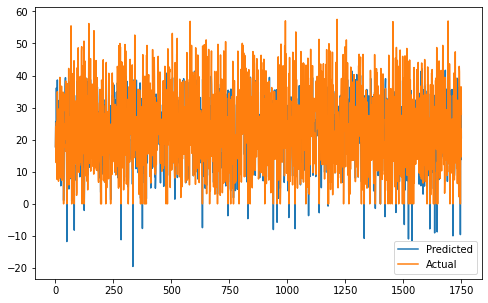

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8,5))
plt.plot(y_predict)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_params_,lasso_regressor.best_score_)

{'alpha': 0.001}
{'alpha': 0.001} -53.22037426102982


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

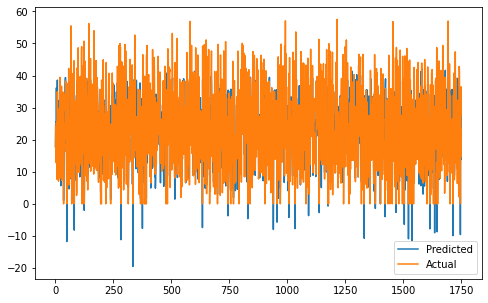

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 54.11088938299782
RMSE : 7.3560104256993695
R2 : 0.6564088171704265
Adjusted R2 :  0.6532402529483671


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 54.11502852725084
RMSE : 7.356291764690335
R2 : 0.6563825345961423
Adjusted R2 :  0.653213727998758


In [ ]:
#to get the complete details of the best model
ridge_regressor.best_estimator_

Ridge(alpha=5)

In [ ]:
# to get only hyperparameter values that we searched for
print(ridge_regressor.best_params_)

{'alpha': 5}


In [ ]:
#score acording to the metric we passed in refit
print(ridge_regressor.best_params_, ridge_regressor.best_score_)

{'alpha': 5} -53.21539952334899


##### Which hyperparameter optimization technique have you used and why?

In almost any Machine Learning project, we train different models on the dataset and select the one with the best performance. However, there is room for improvement as we cannot say for sure that this particular model is best for the problem at hand. Hence, our aim is to improve the model in any way possible. One important factor in the performances of these models are their hyperparameters, once we set appropriate values for these hyperparameters, the performance of a model can improve significantly. In this article, we will find out how we can find optimal values for the hyperparameters of a model by using GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 - Elastic Net Regression

Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, y_train)

0.6484038868536443

In [ ]:
y_pred_en = elasticnet.predict(X_test)


In [ ]:
MSE  = mean_squared_error(y_test, y_pred_en)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_en)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 55.704640587613476
RMSE : 7.4635541525210005
R2 : 0.6462888788775252
Adjusted R2 :  0.6430269895761076


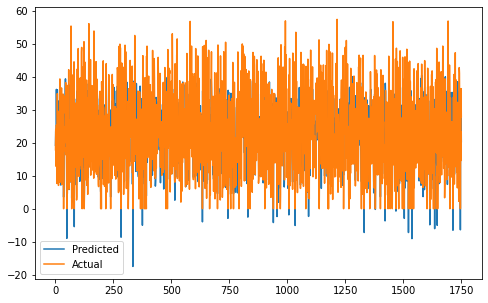

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8,5))
plt.plot(y_pred_en)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)

# Fit the Algorithm
elastic_regressor.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
# Predict on the model
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
print(elastic_regressor.best_params_)
print(elastic_regressor.best_params_, elastic_regressor.best_score_)

{'alpha': 0.001, 'l1_ratio': 0.8}
{'alpha': 0.001, 'l1_ratio': 0.8} -53.220405584187446


##### Which hyperparameter optimization technique have you used and why?

In almost any Machine Learning project, we train different models on the dataset and select the one with the best performance. However, there is room for improvement as we cannot say for sure that this particular model is best for the problem at hand. Hence, our aim is to improve the model in any way possible. One important factor in the performances of these models are their hyperparameters, once we set appropriate values for these hyperparameters, the performance of a model can improve significantly. In this article, we will find out how we can find optimal values for the hyperparameters of a model by using GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

In [ ]:
# ML Model - 3 Implementation
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)



# Fit the Algorithm
decision_regressor.fit(X_train, y_train)

# Predict on the model
y_pred_test_d = decision_regressor.predict(X_test)




#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 33.24439205688377
RMSE : 5.765795006491626
MAE : 4.068852486623639
R2 : 0.7889060756620306
Adjusted R2 : 0.7869593881753405


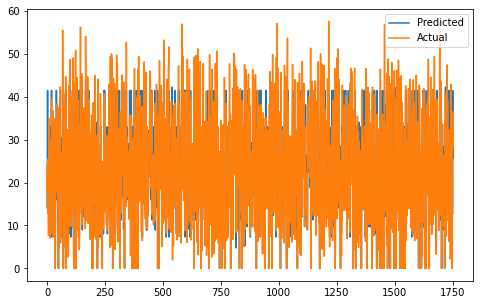

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8,5))
plt.plot(y_pred_test_d)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model-4

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_test_rf = rf_model.predict(X_test)

In [ ]:
MSE_rf= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_rf)
print("MAE :",MAE_rf)
r2_rf= r2_score((y_test), (y_pred_test_rf))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 15.055282108181736
RMSE : 3.8801136720696388
MAE : 2.5456106670388774
R2 : 0.9044025657983651
Adjusted R2 : 0.9035209756270532


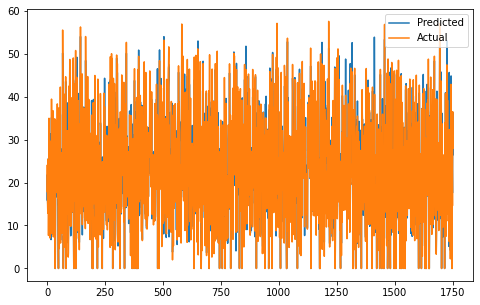

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8,5))
plt.plot(y_pred_test_rf)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).

In linear regression our R2 score is 65 that means our model is able to capture most of the variance.

In ElasticNet our R2 score is 64 that mean our model is not able to capture more variance as compare Linear Regression.

In DecisionTreeRegressor our R2 score is 81 it means our model capture more variance as compare to linear and elasticNet.

In Random Forest regressor our R2 score is 90 it means it captures most variance amongst our models

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

As we can see that RandomForestRegressor R2 score is 90 it means it can capture more varince as compaire to other three models. So i will choose RandomForestRegressor model for final model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':rf_model.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)

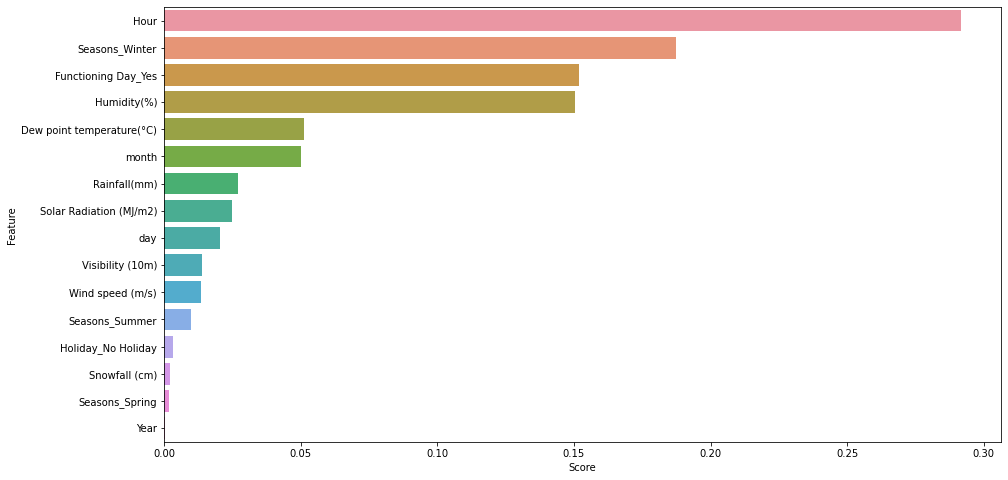

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

# **Conclusion**


*   From the above chart we can clearly say that from the month  5 to 10 the demand of the rented bike count is high as compared to other months.These month are of summer season.
*   From above time plot we can say that in week days,demand of the bike count is higher because of the office and pick time are 7 to 9 AM and 5 to 7 PM.
*   Rented bike count in functioning days is more in use whereas on no working days bike demand are very less.
*   In Summer season the use of rented bike is high and in winter season the use of bike are very less because of snowfall.
* From the  month of April to October we  have high number of bike in demand.
* When the visibility is between 0 to 1000(10m) there is very high demand of bike.
* When rainfall is inbetween to 0 to 20 mm we have high demand of bike.
* When there is no snowfall high number of bike are in demand.
* When wind speed is in between 500 to 1000 m/s bike demand is high.
* From the four models used Random Forest regressor gives the best result with r2 score of 90



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***